In [1]:
import awkward as ak
import numpy as np
import pickle
import hist
import coffea
from python.plugins import *
%matplotlib inline

# from hist import intervals
import matplotlib.pyplot as plt
import mplhep as hep
import matplotlib as mpl

#### test voms connections
# redirector = 'root://xcache/'
redirector='root://cmsxrootd.fnal.gov/'
# files = handleData('fileset_QCD.json', redirector, year = 2018, testing = True)
files = handleData('datasets_UL_NANOAOD.json', redirector, year = 2018, testing = True)
#events = NanoEventsFactory.from_root(redirector+'/store/mc/RunIISummer20UL18NanoAODv9/QCD_Pt_3200toInf_TuneCP5_13TeV_pythia8/NANOAODSIM/106X_upgrade2018_realistic_v16_L1v1-v1/120000/6BEB9A7B-150C-7440-96D8-17A3D87F3225.root', schemaclass=NanoAODSchema).events()

import uproot
# ### uproot notation
qcd_mc = uproot.open(list(files.values())[-1][0])
# qcd_mc = uproot.open(redirector+'/store/mc/RunIISummer20UL18NanoAODv9/QCD_Pt_3200toInf_TuneCP5_13TeV_pythia8/NANOAODSIM/106X_upgrade2018_realistic_v16_L1v1-v1/120000/6BEB9A7B-150C-7440-96D8-17A3D87F3225.root')
uprootevents = qcd_mc['Events']
print(uprootevents.keys('*eight*'))
print(uprootevents['L1PreFiringWeight_Nom'].array())
print(uprootevents['L1PreFiringWeight_Up'].array())
print(uprootevents['L1PreFiringWeight_Dn'].array())
print(uprootevents['Generator_xpdf2'].array())
#### print Q2 scale
print(uprootevents['Generator_scalePDF'].array())


['btagWeight_CSVV2', 'btagWeight_DeepCSVB', 'Generator_weight', 'genWeight', 'nPSWeight', 'PSWeight', 'L1PreFiringWeight_Dn', 'L1PreFiringWeight_ECAL_Dn', 'L1PreFiringWeight_ECAL_Nom', 'L1PreFiringWeight_ECAL_Up', 'L1PreFiringWeight_Muon_Nom', 'L1PreFiringWeight_Muon_StatDn', 'L1PreFiringWeight_Muon_StatUp', 'L1PreFiringWeight_Muon_SystDn', 'L1PreFiringWeight_Muon_SystUp', 'L1PreFiringWeight_Nom', 'L1PreFiringWeight_Up']
[1, 1, 1, 0.999, 1, 1, 1, 1, 0.999, 1, 1, 1, ... 1, 1, 1, 1, 1, 1, 1, 0.996, 1, 1, 1]
[1, 1, 1, 0.999, 1, 1, 1, 1, 0.999, 1, 1, 1, ... 1, 1, 1, 1, 1, 1, 1, 0.996, 1, 1, 1]
[1, 1, 1, 0.999, 1, 1, 1, 1, 1, 1, 1, 1, ... 1, 1, 1, 1, 1, 1, 1, 1, 0.997, 1, 1, 1]
[0.57, 0.205, 0.602, 2.33, 0.267, 0.477, ... 0.0779, 0.317, 1.25, 0.28, 0.00198]
[817, 929, 804, 805, 866, 840, 949, 847, ... 859, 897, 927, 958, 981, 809, 861, 940]


In [2]:
# fname = "coffeaOutput/dijetHists_JetHT_pt200.0_rapidity2.5jesjecALL.pkl"
# with open(fname, "rb") as f:
#     result_data = pickle.load( f )
# fname = "coffeaOutput/dijetHists_wXSscaling_QCDsim_pt200.0_rapidity2.5jesjecALL.pkl"
# with open(fname, "rb") as f:
#     result_mc = pickle.load( f )
fname = "coffeaOutput/dijetHists_JetHT_pt200.0_rapidity2.5jesjecL1PU2016.pkl"
with open(fname, "rb") as f:
    result_data = pickle.load( f )
fname = "coffeaOutput/dijetHists_wXSscaling_QCDsim_pt200.0_rapidity2.5jesjecL1PU2016.pkl"
with open(fname, "rb") as f:
    result_mc = pickle.load( f )
fname = "coffeaOutput/dijetHists_ALL_QCDsim_30.0_2.5_NewHist.pkl"
with open(fname, "rb") as f:
    result_mc_old = pickle.load( f )[0]
os_path = 'plots/comparison/dijet/'
print(result_data['cutflow'])
print(result_mc_old.keys())
checkdir(os_path)

defaultdict_accumulator(<class 'int'>, {'nEvents initial': 128770596, 'nEvents2016/JetHT/Run2016F-UL2016_MiniAODv2_NanoAODv9-v1/NANOAOD': 6613811, 'nEvents after reco kine selection nominal': 1817555, 'nEvents after pT assym. and eta selection nominal': 1742829, 'nEvents final selection nominal': 1742829, 'chunks': 1288, 'nEvents2016/JetHT/Run2016H-UL2016_MiniAODv2_NanoAODv9-v1/NANOAOD': 122156785})
dict_keys(['jet_mass', 'jet_pt', 'jet_eta', 'njet_gen', 'jet_mass_u_reco_over_gen', 'jet_pt_gen', 'jet_mass_gen', 'jet_pt_reco_over_gen', 'jet_dphi_gen', 'jet_ptasymm_gen', 'jet_dr_gen_subjet', 'dijet_dr_reco_to_gen', 'dr_reco_to_gen_subjet', 'misses', 'fakes', 'jet_pt_mass_reco_u', 'jet_pt_mass_reco_g', 'jet_pt_mass_u_gen', 'jet_pt_mass_g_gen', 'jet_m_pt_u_reco_over_gen', 'jet_m_pt_g_reco_over_gen', 'response_matrix_u', 'response_matrix_g', 'cutflow'])


['dataset', 'syst', 'ptreco', 'mreco', 'ptgen', 'mgen']
[200.0, 280.0, 360.0, 450.0, 520.0, 630.0, 690.0, 750.0, 800.0, 1300.0]
10
[0.0, 1.0, 5.0, 10.0, 20.0, 40.0, 60.0, 80.0, 100.0, 150.0, 200.0, 250.0]


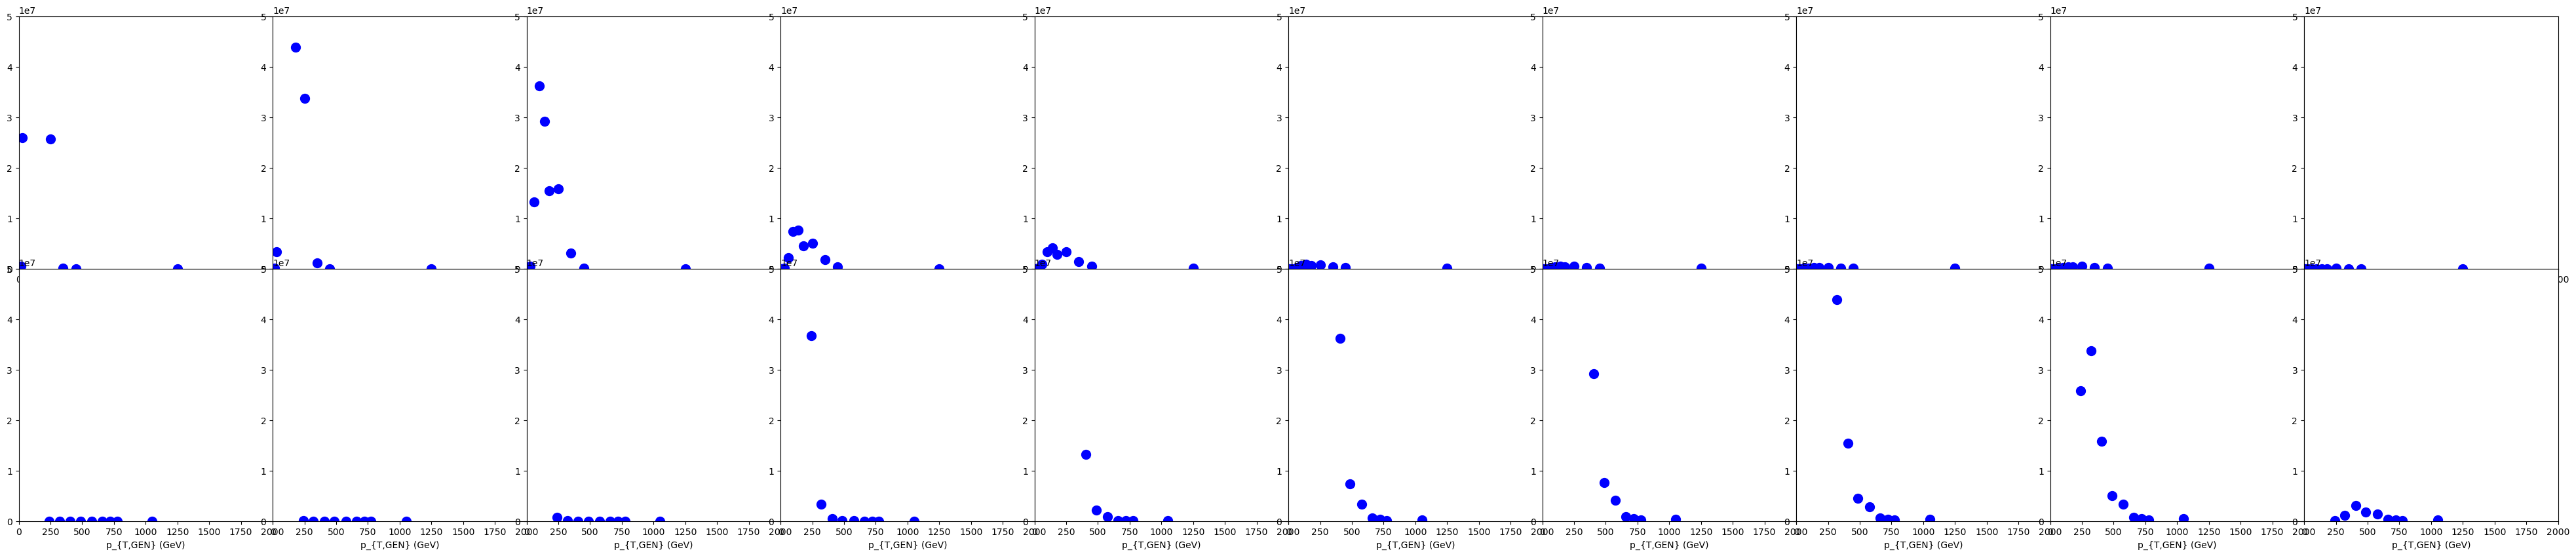

In [3]:
pt_bins = [bin[0] for bin in result_mc['response_matrix_u'].project('ptgen').axes[0]]
m_bins = [bin[0] for bin in result_mc['response_matrix_u'].project('mgen').axes[0]]
lastbin = result_mc['response_matrix_u'].project('ptgen').axes[0][-1][1]
axis_names = [ax.name for ax in result_mc['response_matrix_u'].axes]
print(axis_names)
# pt_bins.append(lastbin)
print(pt_bins)
print(len(pt_bins))
print(m_bins)
plt.rcParams["figure.figsize"] = (50,10)

fig, axs = plt.subplots(2, int(len(pt_bins)))
for i, bin in enumerate(pt_bins):
    ax = axs.flatten()[i]
    axm = axs.flatten()[i+len(pt_bins)]
    hep.histplot(result_mc['response_matrix_u'][{'ptgen':i, 'dataset':sum, 'syst':'nominal'}].project('mgen'), stack=False, histtype='errorbar',
                         ax=ax, density=False, marker =["o"], color = 'blue',
                         label=['Dijet Mass Unrolled' + str(m_bins[i])], flow='sum')
    hep.histplot(result_mc['response_matrix_u'][{'mgen':i, 'dataset':sum, 'syst':'nominal'}].project('ptgen'), stack=False, histtype='errorbar',
                         ax=axm, density=False, marker =["o"], color = 'blue', flow='sum',
                         label=['Dijet Mass Unrolled' + str(m_bins[i])])
    ax.set_xlim([0,1000])
    ax.set_ylim([0,5E7])
    axm.set_xlim([0,2000])
    axm.set_ylim([0,5E7])
plt.subplots_adjust(wspace=0.0, hspace=0.0)
plt.savefig(os_path+"/unrolledPtGenMGen2016.png")

['dataset', 'syst', 'ptreco', 'mreco']
[200.0, 280.0, 360.0, 450.0, 520.0, 630.0, 690.0, 750.0, 800.0, 1300.0]
10
[0.0, 0.5, 1.0, 3.0, 5.0, 7.5, 10.0, 15.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0, 125.0, 150.0, 175.0, 200.0, 225.0, 250.0, 625.0]


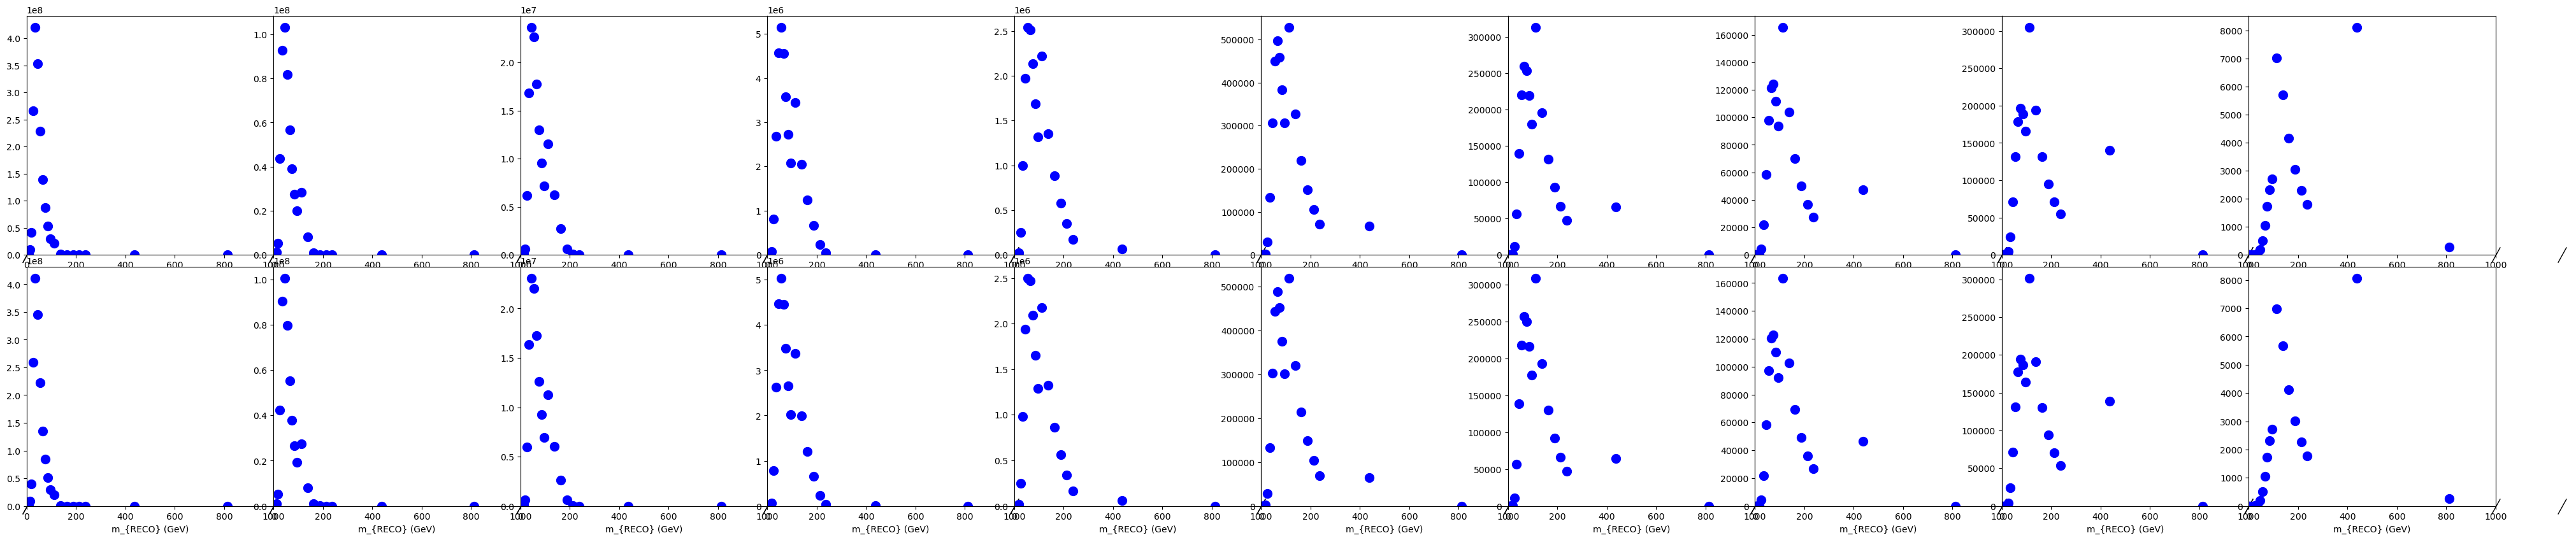

In [4]:
pt_bins = [bin[0] for bin in result_mc['jet_pt_mass_reco_u'].project('ptreco').axes[0]]
m_bins = [bin[0] for bin in result_mc['jet_pt_mass_reco_u'].project('mreco').axes[0]]
lastbin = result_mc['jet_pt_mass_reco_u'].project('ptreco').axes[0][-1][1]
axis_names = [ax.name for ax in result_mc['jet_pt_mass_reco_u'].axes]
print(axis_names)
# pt_bins.append(lastbin)
print(pt_bins)
print(len(pt_bins))
print(m_bins)
plt.rcParams["figure.figsize"] = (50,10)

fig, axs = plt.subplots(2, int(len(pt_bins)))
for i, bin in enumerate(pt_bins):
    ax = axs.flatten()[i]
    axm = axs.flatten()[i+len(pt_bins)]
    hep.histplot(result_mc['jet_pt_mass_reco_u'][{'ptreco':i, 'dataset':sum, 'syst':'nominal'}].project('mreco'), stack=False, histtype='errorbar',
                         ax=ax, density=False, marker =["o"], color = 'blue',
                         label=['Dijet Mass Unrolled' + str(m_bins[i])])
    hep.histplot(result_mc['response_matrix_u'][{'ptreco':i, 'dataset':sum, 'syst':'nominal'}].project('mreco'), stack=False, histtype='errorbar',
                         ax=axm, density=False, marker =["o"], color = 'blue',
                         label=['Dijet Mass Unrolled' + str(m_bins[i])])
    ax.set_xlim([0,1000])
    # ax.set_ylim([0,2E7])
    axm.set_xlim([0,1000])
    # axm.set_ylim([0,2E7])
plt.subplots_adjust(wspace=0.0, hspace=0.05)
plt.savefig(os_path+"/unrolledPtRecoMReco2016.png")

dict_keys(['jet_mass', 'jet_pt', 'jet_rap', 'jet_eta', 'njet_gen', 'jet_mass_u_reco_over_gen', 'jet_pt_gen', 'jet_mass_gen', 'jet_pt_reco_over_gen', 'jet_dphi_gen', 'jet_ptasymm_gen', 'jet_dr_gen_subjet', 'dijet_dr_reco_to_gen', 'dr_reco_to_gen_subjet', 'misses', 'fakes', 'weights', 'jet_pt_mass_reco_u', 'jet_pt_mass_reco_g', 'jet_pt_mass_gen_u', 'jet_pt_mass_gen_g', 'jet_m_pt_u_reco_over_gen', 'jet_m_pt_g_reco_over_gen', 'response_matrix_u', 'response_matrix_g', 'cutflow'])
['dataset', 'syst', 'ptreco', 'mreco']
[(200.0, 280.0), (280.0, 360.0), (360.0, 450.0), (450.0, 520.0), (520.0, 630.0), (630.0, 690.0), (690.0, 750.0), (750.0, 800.0), (800.0, 1300.0), (1300.0, 13000.0)]
['nominal', 'jesUp', 'jesDown', 'jerUp', 'jerDown']
Axes(0.125,0.53;0.352273x0.35)
Axes(0.547727,0.53;0.352273x0.35)
Axes(0.125,0.11;0.352273x0.35)
Axes(0.547727,0.11;0.352273x0.35)


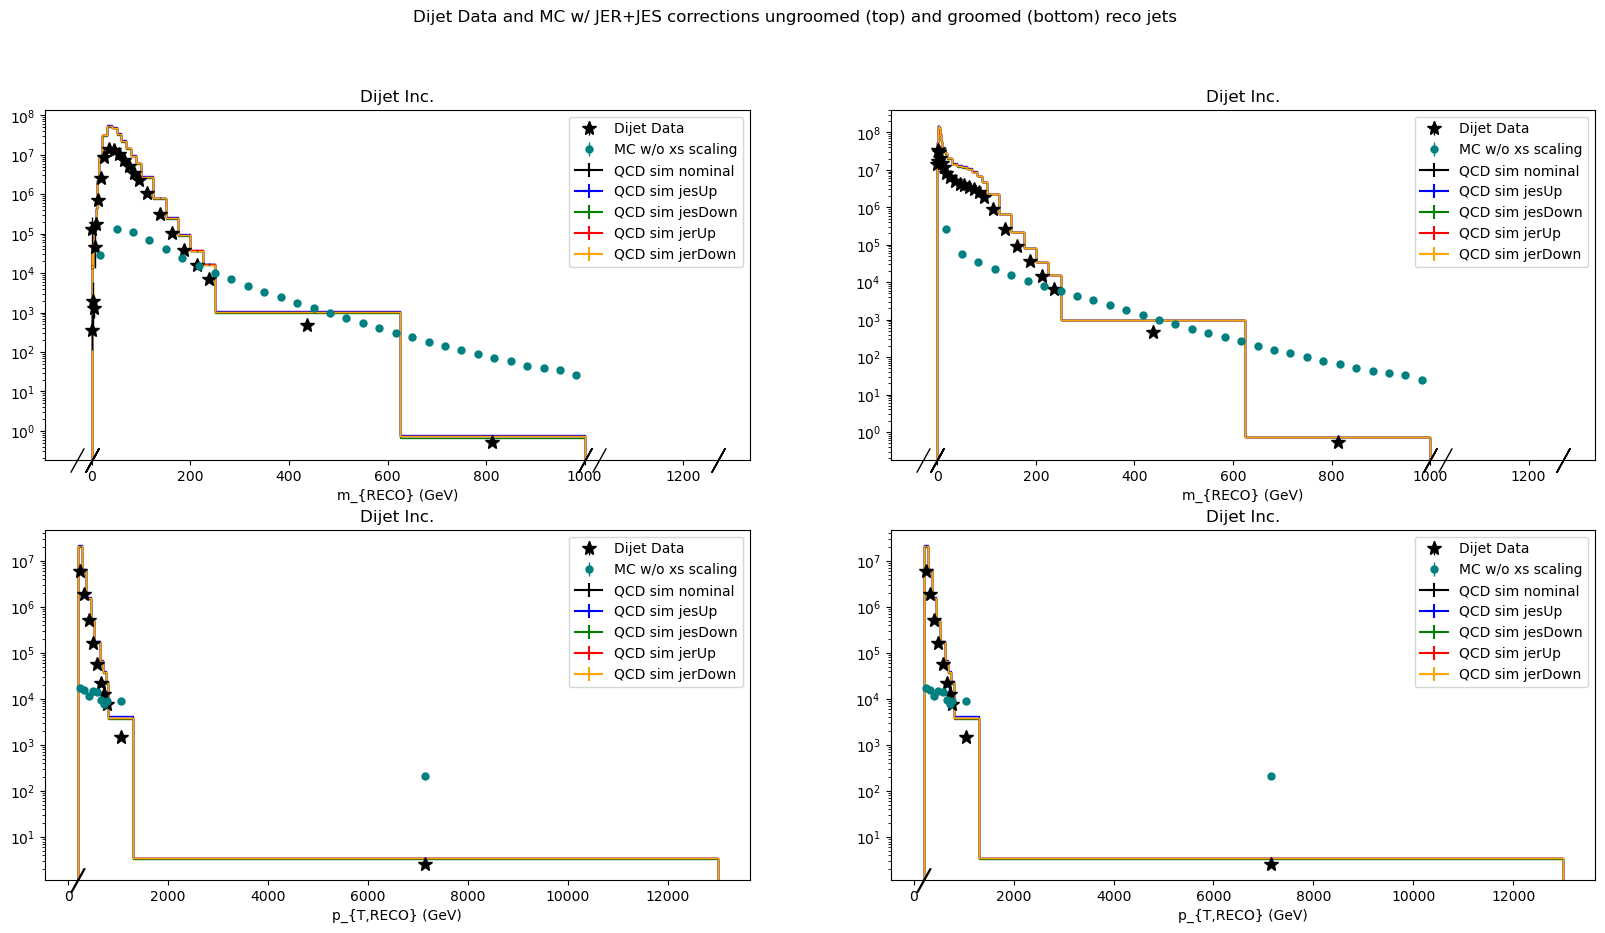

In [5]:
plt.rcParams["figure.figsize"] = (20,10)
print(result_mc.keys())
axis_names = [ax.name for ax in result_mc['jet_pt_mass_reco_u'].axes]
print(axis_names)
cats = [cat for cat in result_mc['jet_pt_mass_reco_u'][{'ptreco':sum, 'dataset':sum, 'mreco':sum}].axes[0]]
pt_bins = [bin for bin in result_mc['jet_pt_mass_reco_u'].project("ptreco").axes[0]]
print(pt_bins)
fig, axs = plt.subplots(2, 2)
colors = ['k', 'b', 'g', 'r', 'orange', 'c', 'm']
print(cats)
fig.suptitle('Dijet Data and MC w/ JER+JES corrections ungroomed (top) and groomed (bottom) reco jets')
data = [result_data['jet_pt_mass_reco_u'][{'dataset':sum, 'syst':'nominal'}].project('mreco'), 
        result_data['jet_pt_mass_reco_g'][{'dataset':sum, 'syst':'nominal'}].project('mreco'),
       result_data['jet_pt_mass_reco_u'][{'dataset':sum, 'syst':'nominal'}].project('ptreco'), 
        result_data['jet_pt_mass_reco_g'][{'dataset':sum, 'syst':'nominal'}].project('ptreco')]
mc_old = [result_mc_old['jet_pt_mass_reco_u'][{'dataset':sum,}].project('mreco'), 
        result_mc_old['jet_pt_mass_reco_g'][{'dataset':sum,}].project('mreco'),
       result_mc_old['jet_pt_mass_reco_u'][{'dataset':sum,}].project('ptreco'), 
        result_mc_old['jet_pt_mass_reco_g'][{'dataset':sum,}].project('ptreco')]
for i, ax in enumerate(axs.flatten()):
    print(ax)
    hep.histplot(data[i], stack=False, histtype='errorbar', binwnorm=1,
                         ax=ax, density=False, marker =["*"], color = 'black',
                         label=['Dijet Data'])
    hep.histplot(mc_old[i], stack=False, histtype='errorbar', binwnorm=1,
                         ax=ax, density=False, marker =["."], color = 'teal',
                         label=['MC w/o xs scaling'])
    for j in range(len(cats)):
        syst=cats[j]
        mc = [result_mc['jet_pt_mass_reco_u'][{'dataset':sum, 'syst':syst}].project('mreco'), 
                      result_mc['jet_pt_mass_reco_g'][{'dataset':sum, 'syst':syst}].project('mreco'),
             result_mc['jet_pt_mass_reco_u'][{'dataset':sum, 'syst':syst}].project('ptreco'), 
                      result_mc['jet_pt_mass_reco_g'][{'dataset':sum, 'syst':syst}].project('ptreco')]
        hep.histplot(mc[i], stack=False, histtype='step', binwnorm=1,
                         ax=ax, density=False, linestyle =["-"],
                             color = colors[j], linewidth=1,
                         label=['QCD sim '+syst])
    ax.set_title("Dijet Inc.")
    ax.legend()
axs[0,0].set_yscale('log')
axs[1,0].set_yscale('log')
axs[0,1].set_yscale('log')
axs[1,1].set_yscale('log')

plt.savefig(os_path+"/compareDataMC_wXSscaling_wJERJESlog.png")

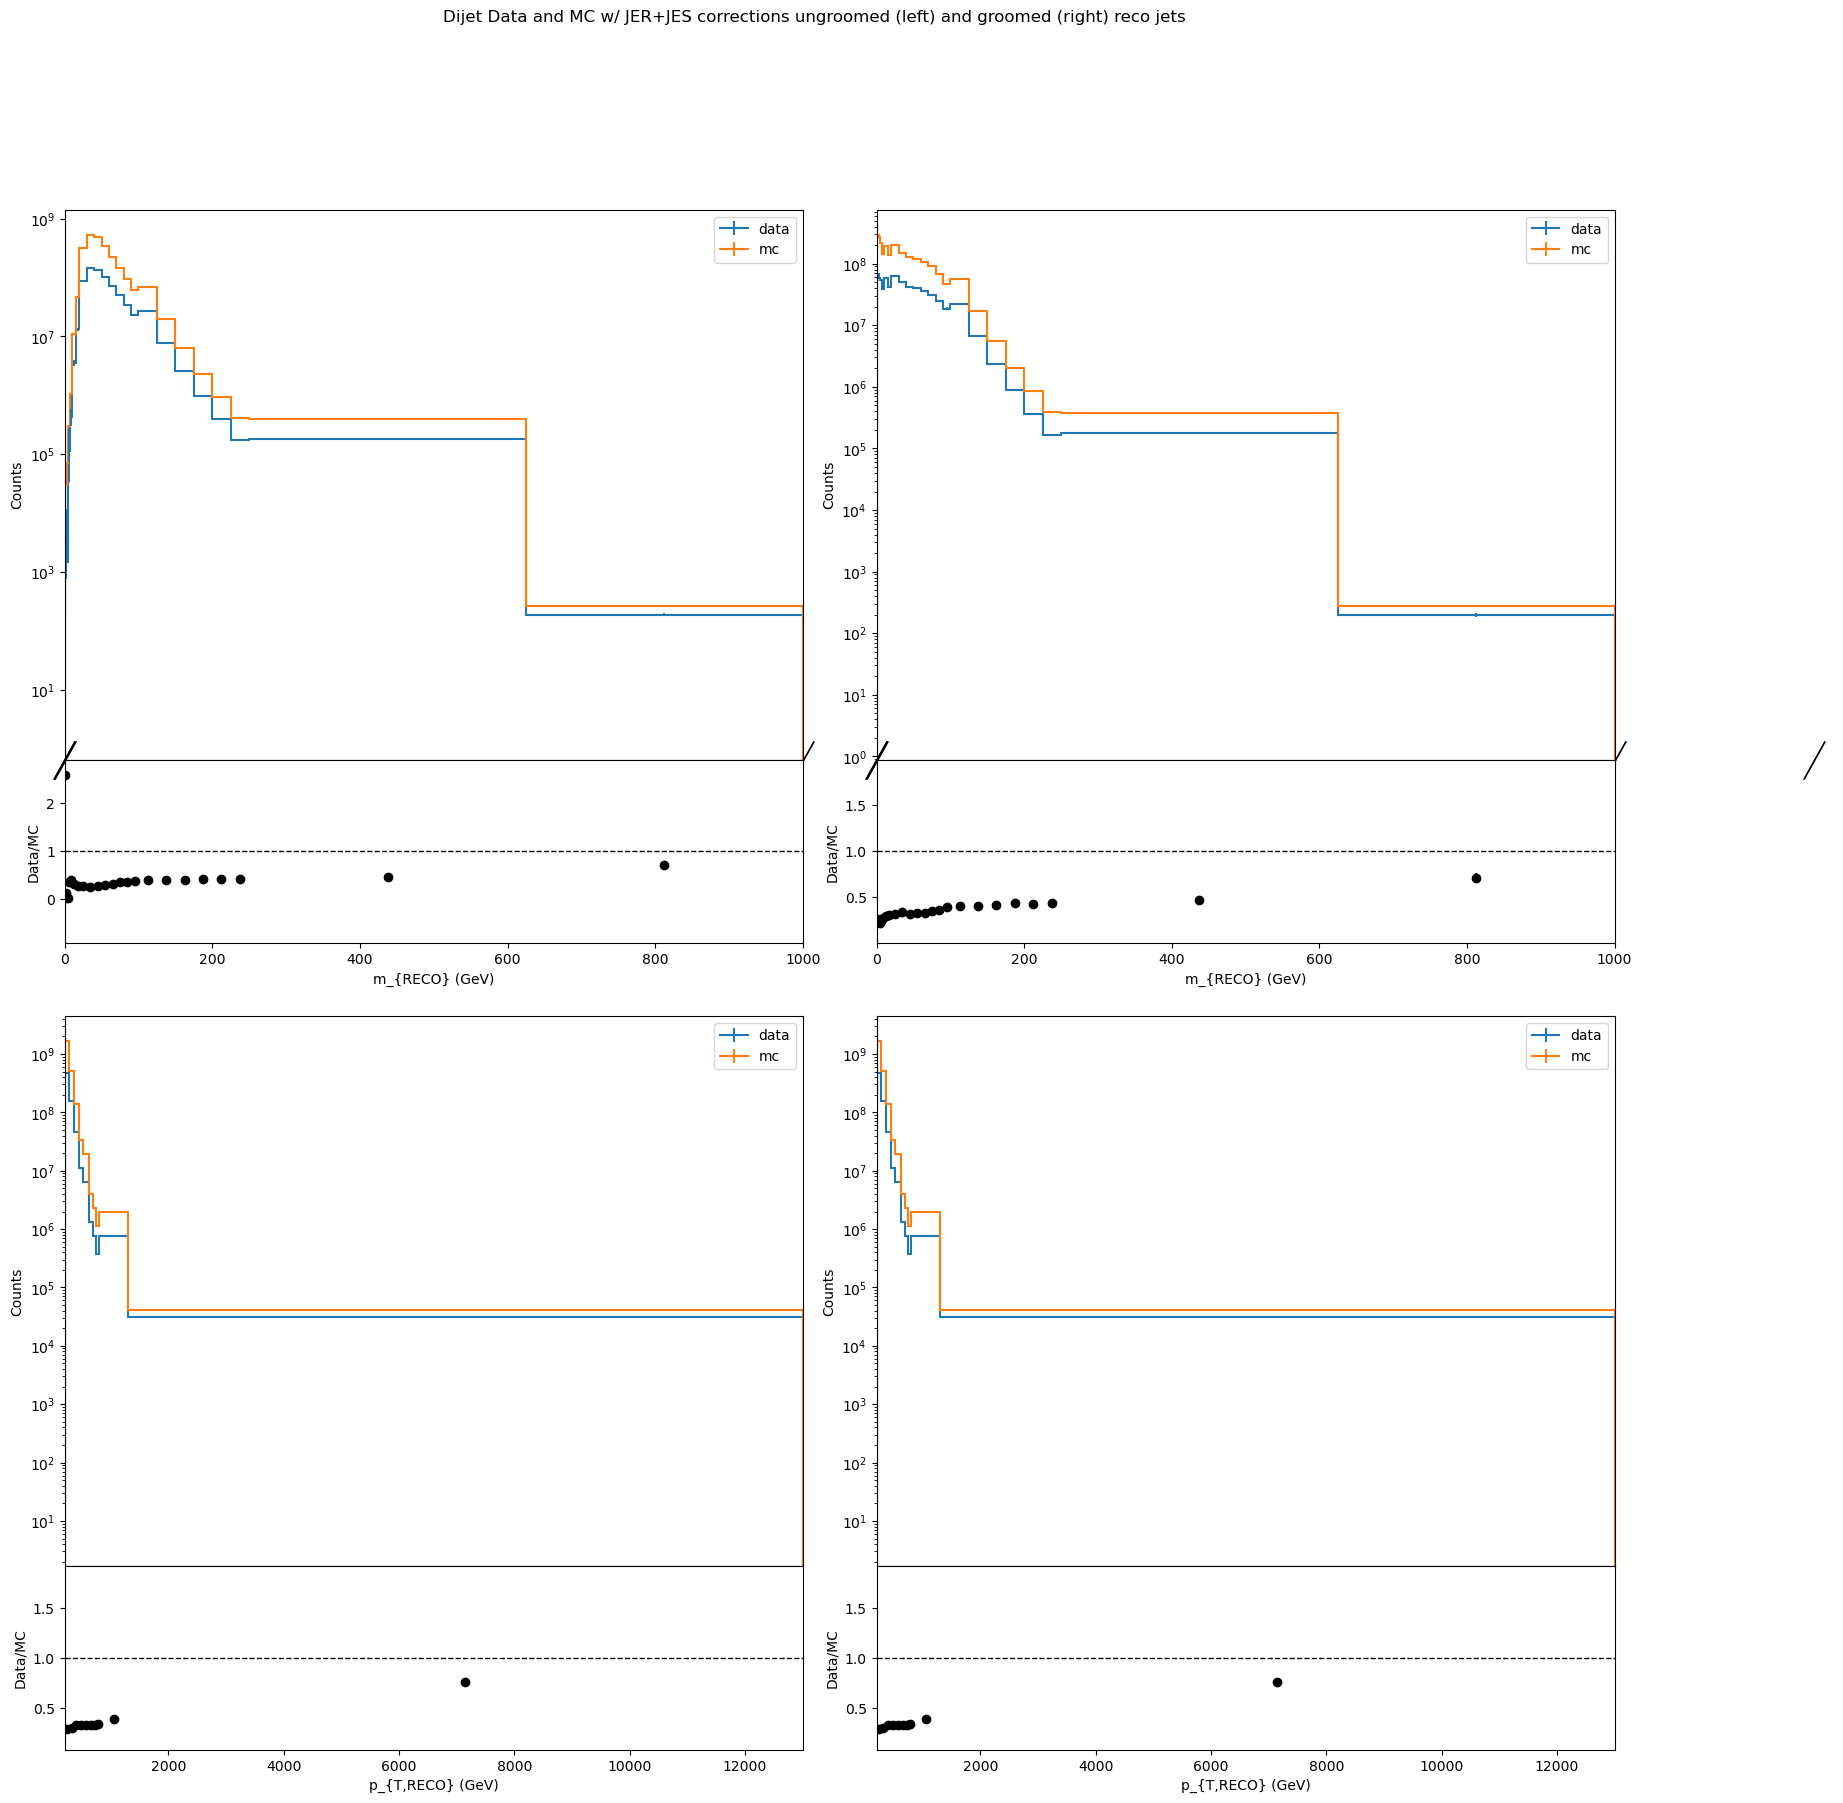

In [6]:
plt.rcParams["figure.figsize"] = (20,20)
fig = plt.figure()
fig.suptitle('Dijet Data and MC w/ JER+JES corrections ungroomed (left) and groomed (right) reco jets')
grids = fig.add_gridspec(2,2, figure=fig, wspace=0.1, hspace=0.1)
subgrids = [grid.subgridspec(4,1, wspace=0, hspace=0) for grid in grids]
mc = [result_mc['jet_pt_mass_reco_u'][{'dataset':sum, 'syst':'nominal'}].project('mreco'), 
                      result_mc['jet_pt_mass_reco_g'][{'dataset':sum, 'syst':'nominal'}].project('mreco'),
             result_mc['jet_pt_mass_reco_u'][{'dataset':sum, 'syst':'nominal'}].project('ptreco'), 
                      result_mc['jet_pt_mass_reco_g'][{'dataset':sum, 'syst':'nominal'}].project('ptreco')]
for i, sg in enumerate(subgrids):
    num = data[i]
    denom = mc[i]
    main_ax = fig.add_subplot(sg[:-1, :])
    main_ax.set_yscale("log")
    main_ax.set_xlim([0,2200])
    subplot_ax = fig.add_subplot(sg[-1, :], sharex=main_ax)
    plt.setp(main_ax.get_xticklabels(), visible=False)
    main_ax, sublot_ax = num.plot_ratio(denom,
                                              rp_num_label="data",
                                              rp_denom_label="mc",
                                              rp_uncert_draw_type="line",
                                              ax_dict = {"main_ax":main_ax,"ratio_ax":subplot_ax})

    plt.ylabel("Data/MC")
plt.savefig(os_path+"/compareDataMC_wXSscaling_wJERJES.png")

In [7]:
fname = "coffeaOutput/trijetHists_JetHT_pt200.0_rappidity2.5_bbloosejesjecALL.pkl"
with open(fname, "rb") as f:
    result_data = pickle.load( f )
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_bbloosejesjecALL.pkl"
with open(fname, "rb") as f:
    result_mc = pickle.load( f )
fname = "coffeaOutput/trijetHists_QCDsim_pt200.0_eta2.4_bbloose.pkl"
with open(fname, "rb") as f:
    result_mc_old = pickle.load( f )[0]
os_path = 'plots/comparison/trijet/'
checkdir(os_path)
print(result_data['cutflow'])
print(result_mc['cutflow'])

defaultdict_accumulator(<class 'int'>, {'chunks': 7853})
defaultdict_accumulator(<class 'int'>, {'misses': 390049375, 'nGluonJets': 163030, 'n3Jets': 322436, 'chunks': 8235})


['dataset', 'syst', 'ptreco', 'mreco']
[200.0, 280.0, 360.0, 450.0, 520.0, 630.0, 690.0, 750.0, 800.0, 1300.0]
10
[0.0, 0.5, 1.0, 3.0, 5.0, 7.5, 10.0, 15.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0, 125.0, 150.0, 175.0, 200.0, 225.0, 250.0, 625.0]


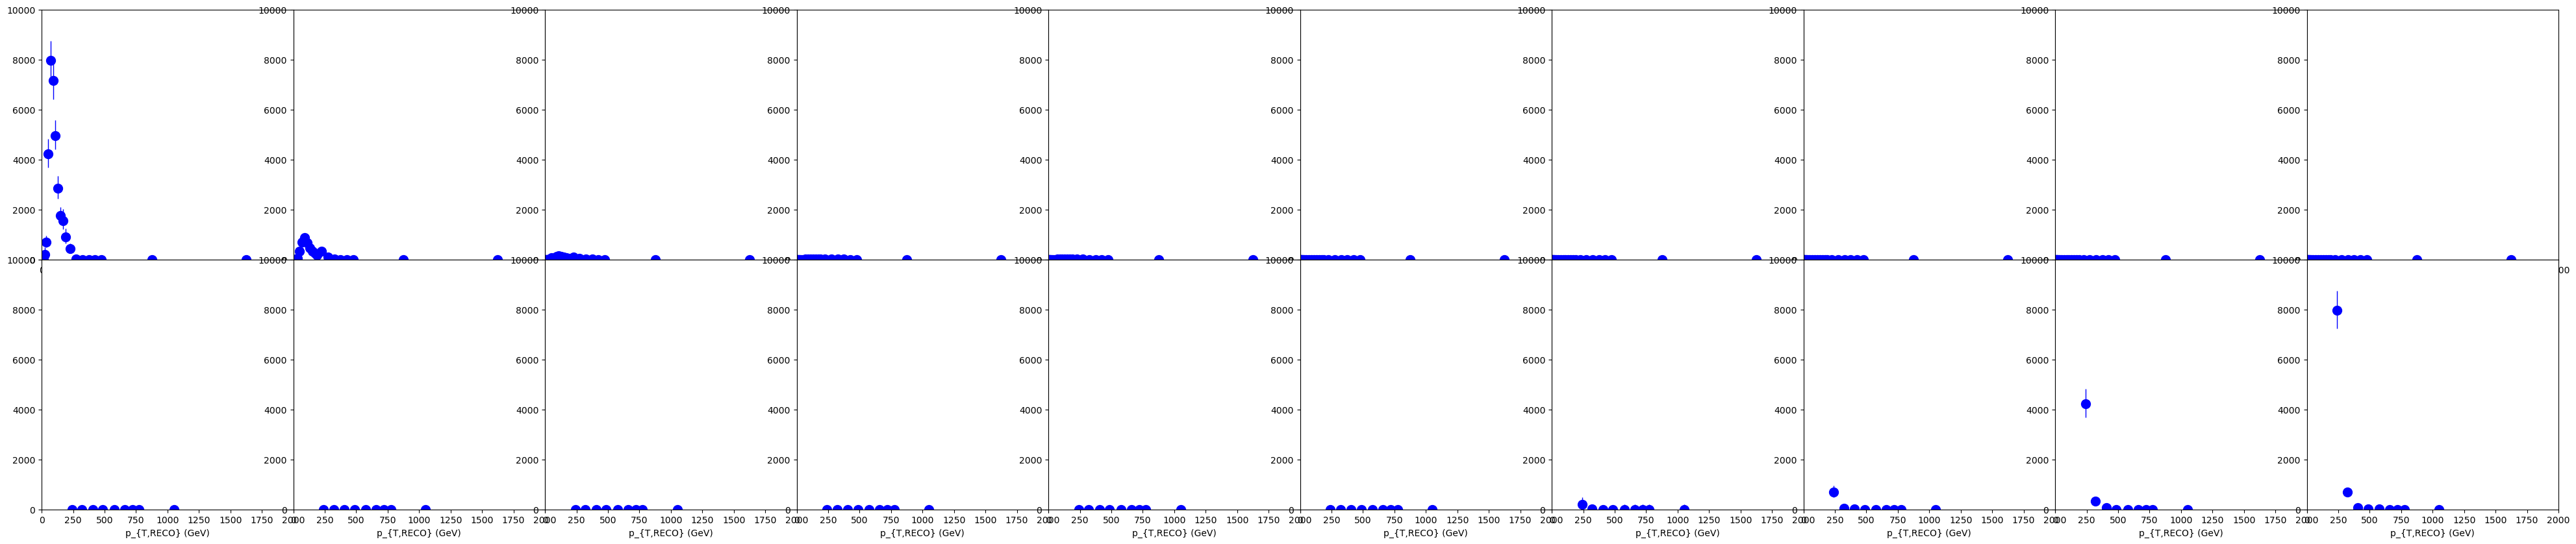

In [8]:
pt_bins = [bin[0] for bin in result_mc['jet_pt_mass_reco_u'].project('ptreco').axes[0]]
m_bins = [bin[0] for bin in result_mc['jet_pt_mass_reco_u'].project('mreco').axes[0]]
lastbin = result_mc['jet_pt_mass_reco_u'].project('ptreco').axes[0][-1][1]
axis_names = [ax.name for ax in result_mc['jet_pt_mass_reco_u'].axes]
print(axis_names)
# pt_bins.append(lastbin)
print(pt_bins)
print(len(pt_bins))
print(m_bins)
plt.rcParams["figure.figsize"] = (50,10)

fig, axs = plt.subplots(2, int(len(pt_bins)))
for i, bin in enumerate(pt_bins):
    ax = axs.flatten()[i]
    axm = axs.flatten()[i+len(pt_bins)]
    hep.histplot(result_mc['jet_pt_mass_reco_u'][{'ptreco':i, 'dataset':sum, 'syst':'nominal'}], stack=False, histtype='errorbar',
                         ax=ax, density=False, marker =["o"], color = 'blue',
                         label=['Trijet Mass Unrolled' + str(m_bins[i])], flow='sum')
    hep.histplot(result_mc['jet_pt_mass_reco_u'][{'mreco':i, 'dataset':sum, 'syst':'nominal'}], stack=False, histtype='errorbar',
                         ax=axm, density=False, marker =["o"], color = 'blue',
                         label=['Trijet Mass Unrolled' + str(m_bins[i])])
    ax.set_xlim([0,1000])
    ax.set_ylim([0,10000])
    axm.set_xlim([0,2000])
    axm.set_ylim([0,10000])
plt.subplots_adjust(wspace=0.0, hspace=0.0)
plt.savefig(os_path+"/unrolledPtRecoMReco.png")

['dataset', 'syst', 'ptreco', 'mreco']
[200.0, 280.0, 360.0, 450.0, 520.0, 630.0, 690.0, 750.0, 800.0, 1300.0]
10
[0.0, 0.5, 1.0, 3.0, 5.0, 7.5, 10.0, 15.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0, 125.0, 150.0, 175.0, 200.0, 225.0, 250.0, 625.0]


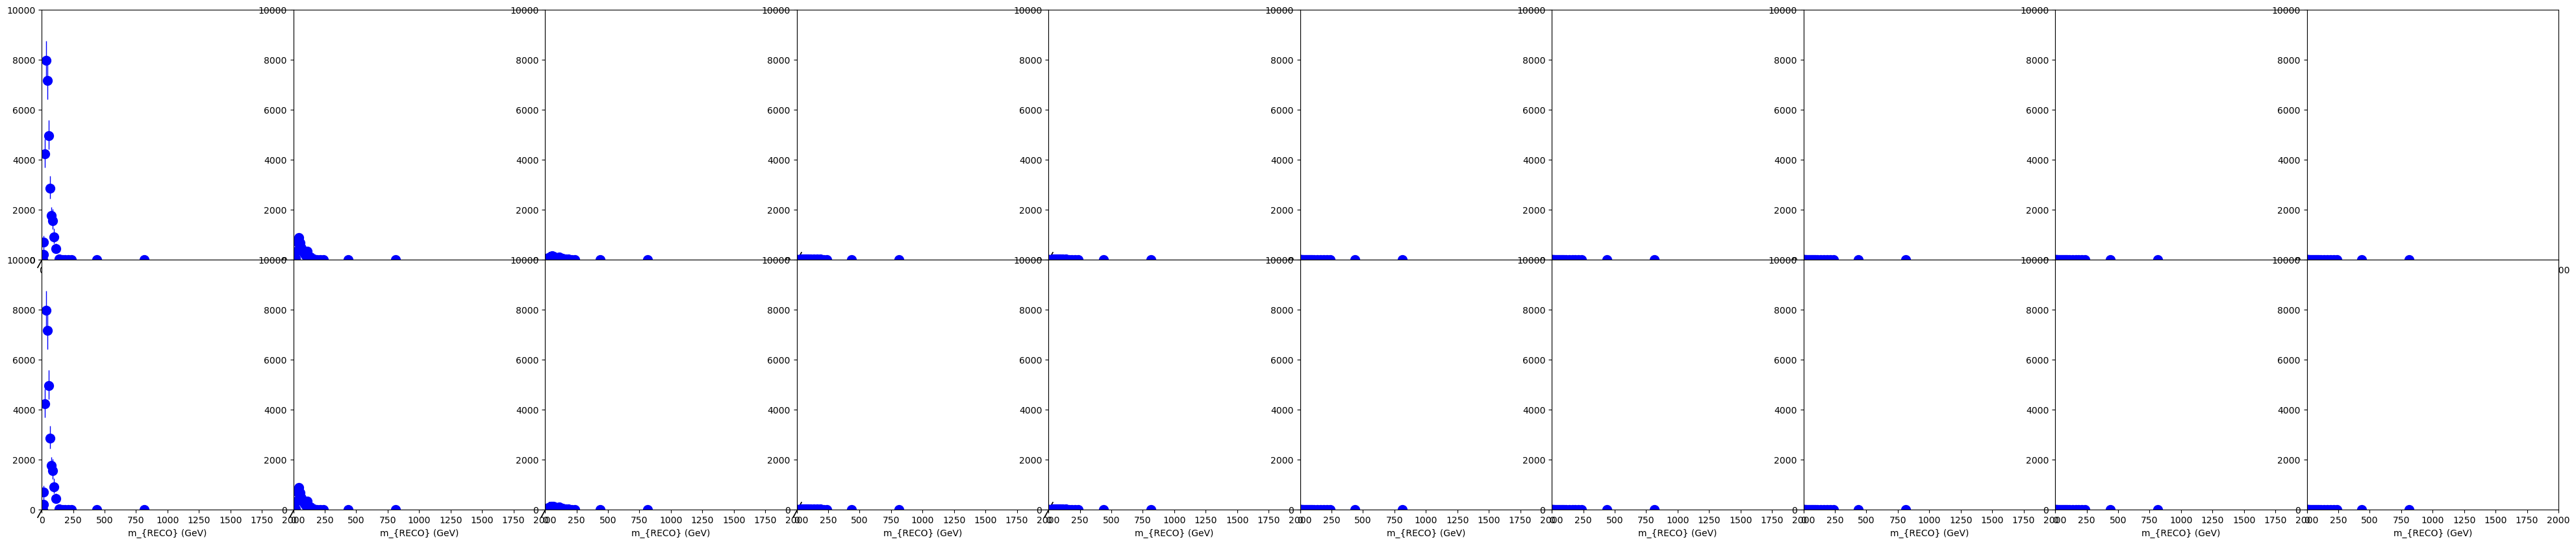

In [9]:
pt_bins = [bin[0] for bin in result_mc['jet_pt_mass_reco_u'].project('ptreco').axes[0]]
m_bins = [bin[0] for bin in result_mc['jet_pt_mass_reco_u'].project('mreco').axes[0]]
lastbin = result_mc['jet_pt_mass_reco_u'].project('ptreco').axes[0][-1][1]
axis_names = [ax.name for ax in result_mc['jet_pt_mass_reco_u'].axes]
print(axis_names)
# pt_bins.append(lastbin)
print(pt_bins)
print(len(pt_bins))
print(m_bins)
plt.rcParams["figure.figsize"] = (50,10)

fig, axs = plt.subplots(2, int(len(pt_bins)))
for i, bin in enumerate(pt_bins):
    ax = axs.flatten()[i]
    axm = axs.flatten()[i+len(pt_bins)]
    hep.histplot(result_mc['jet_pt_mass_reco_u'][{'ptreco':i, 'dataset':sum, 'syst':'nominal'}].project('mreco'), stack=False, histtype='errorbar',
                         ax=ax, density=False, marker =["o"], color = 'blue',
                         label=['Dijet Mass Unrolled' + str(m_bins[i])])
    hep.histplot(result_mc['response_matrix_u'][{'ptreco':i, 'dataset':sum, 'syst':'nominal'}].project('mreco'), stack=False, histtype='errorbar',
                         ax=axm, density=False, marker =["o"], color = 'blue',
                         label=['Dijet Mass Unrolled' + str(m_bins[i])])
    ax.set_xlim([0,2000])
    ax.set_ylim([0,10000])
    axm.set_xlim([0,2000])
    axm.set_ylim([0,10000])
plt.subplots_adjust(wspace=0.0, hspace=0.0)
plt.savefig(os_path+"/unrolledPtRecoMReco.png")

dict_keys(['jet_mass', 'jet_pt', 'jet_eta', 'btag', 'cutflow', 'njet_gen', 'dphimin_gen', 'asymm_gen', 'njet_reco', 'dphimin_reco', 'asymm_reco', 'jet_dr_reco_gen', 'jet_mass_reco_over_gen', 'jet_pt_reco', 'jet_pt_gen', 'jet_pt_reco_over_gen', 'jet_eta_reco', 'jet_eta_gen', 'jet_rap_reco', 'jet_rap_gen', 'jet_dphi_reco', 'jet_ptasymm_reco', 'jet_dr_gen_subjet', 'jet_dr_reco_to_gen_subjet', 'jet_sd_mass_reco', 'jet_sd_mass_gen', 'misses_g', 'fakes_g', 'misses', 'fakes', 'jet_pt_mass_reco_u', 'jet_pt_mass_reco_g', 'jet_pt_mass_gen_u', 'jet_pt_mass_gen_g', 'jet_m_pt_u_reco_over_gen', 'jet_m_pt_g_reco_over_gen', 'response_matrix_u', 'response_matrix_g', 'weights', 'systematics'])
['dataset', 'syst', 'ptreco', 'mreco']
[(200.0, 280.0), (280.0, 360.0), (360.0, 450.0), (450.0, 520.0), (520.0, 630.0), (630.0, 690.0), (690.0, 750.0), (750.0, 800.0), (800.0, 1300.0), (1300.0, 13000.0)]
['nominal', 'jesUp', 'jesDown', 'jerUp', 'jerDown']


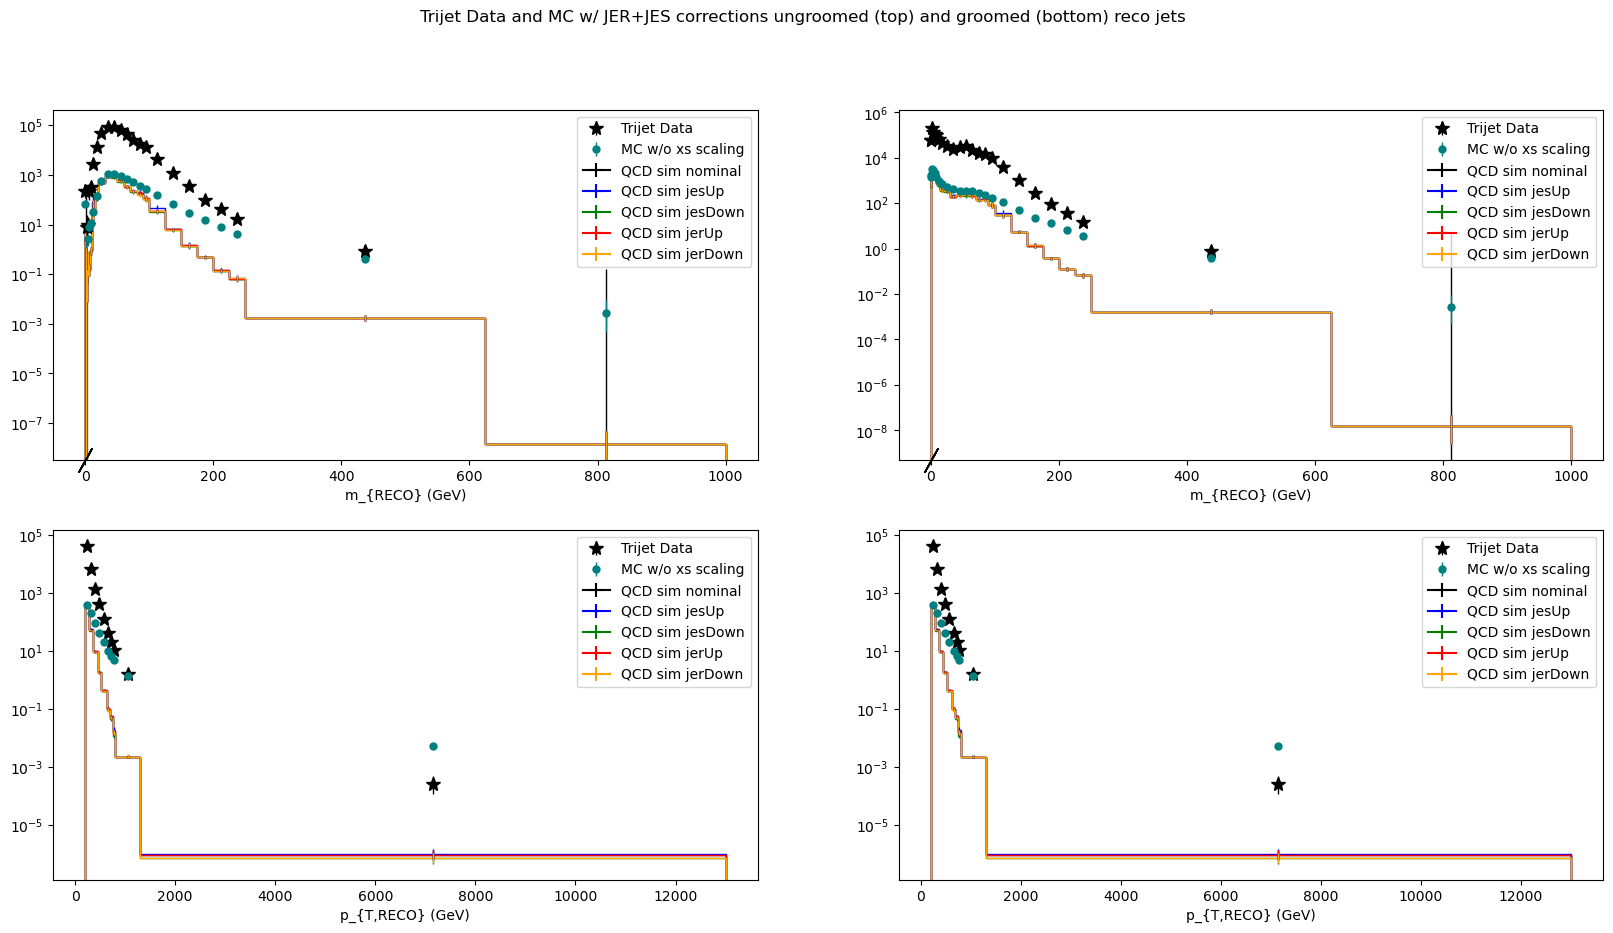

In [10]:
plt.rcParams["figure.figsize"] = (20,10)
print(result_mc.keys())
axis_names = [ax.name for ax in result_mc['jet_pt_mass_reco_u'].axes]
print(axis_names)
cats = [cat for cat in result_mc['jet_pt_mass_reco_u'][{'ptreco':sum, 'dataset':sum, 'mreco':sum}].axes[0]]
pt_bins = [bin for bin in result_mc['jet_pt_mass_reco_u'].project("ptreco").axes[0]]
print(pt_bins)
fig, axs = plt.subplots(2, 2)
colors = ['k', 'b', 'g', 'r', 'orange', 'c', 'm']
print(cats)
fig.suptitle('Trijet Data and MC w/ JER+JES corrections ungroomed (top) and groomed (bottom) reco jets')
# mc = [result['jet_pt_mass_reco_u'][{'dataset':sum}].project('ptreco'), 
#       result['jet_pt_mass_reco_u'][{'dataset':sum}].project('mreco'), 
#       result['jet_pt_mass_reco_g'][{'dataset':sum}].project('ptreco'), 
#       result['jet_pt_mass_reco_g'][{'dataset':sum}].project('mreco')]
data = [result_data['jet_pt_mass_reco_u'][{'dataset':sum, 'syst':'nominal'}].project('mreco'), 
        result_data['jet_pt_mass_reco_g'][{'dataset':sum, 'syst':'nominal'}].project('mreco'),
       result_data['jet_pt_mass_reco_u'][{'dataset':sum, 'syst':'nominal'}].project('ptreco'), 
        result_data['jet_pt_mass_reco_g'][{'dataset':sum, 'syst':'nominal'}].project('ptreco')]
mc_old = [result_mc_old['jet_pt_mass_reco_u'][{'dataset':sum,}].project('mreco'), 
        result_mc_old['jet_pt_mass_reco_g'][{'dataset':sum,}].project('mreco'),
       result_mc_old['jet_pt_mass_reco_u'][{'dataset':sum,}].project('ptreco'), 
        result_mc_old['jet_pt_mass_reco_g'][{'dataset':sum,}].project('ptreco')]
for i, ax in enumerate(axs.flatten()):
    hep.histplot(data[i], stack=False, histtype='errorbar', binwnorm=1,
                         ax=ax, density=False, marker =["*"], color = 'black',
                         label=['Trijet Data'])
    hep.histplot(mc_old[i], stack=False, histtype='errorbar', binwnorm=1,
                         ax=ax, density=False, marker =["."], color = 'teal',
                         label=['MC w/o xs scaling'])
    for j in range(len(cats)):
        syst=cats[j]
        mc = [result_mc['jet_pt_mass_reco_u'][{'dataset':sum, 'syst':syst}].project('mreco'), 
                      result_mc['jet_pt_mass_reco_g'][{'dataset':sum, 'syst':syst}].project('mreco'),
             result_mc['jet_pt_mass_reco_u'][{'dataset':sum, 'syst':syst}].project('ptreco'), 
                      result_mc['jet_pt_mass_reco_g'][{'dataset':sum, 'syst':syst}].project('ptreco')]
        hep.histplot(mc[i], stack=False, histtype='step', binwnorm=1,
                         ax=ax, density=False, linestyle =["-"],
                             color = colors[j], linewidth=1,
                         label=['QCD sim '+syst])
    ax.legend()
axs[0,0].set_yscale('log')
axs[1,0].set_yscale('log')
axs[0,1].set_yscale('log')
axs[1,1].set_yscale('log')
plt.savefig(os_path+"/compareDataMC_wXSscaling_wJERJESlog.png")

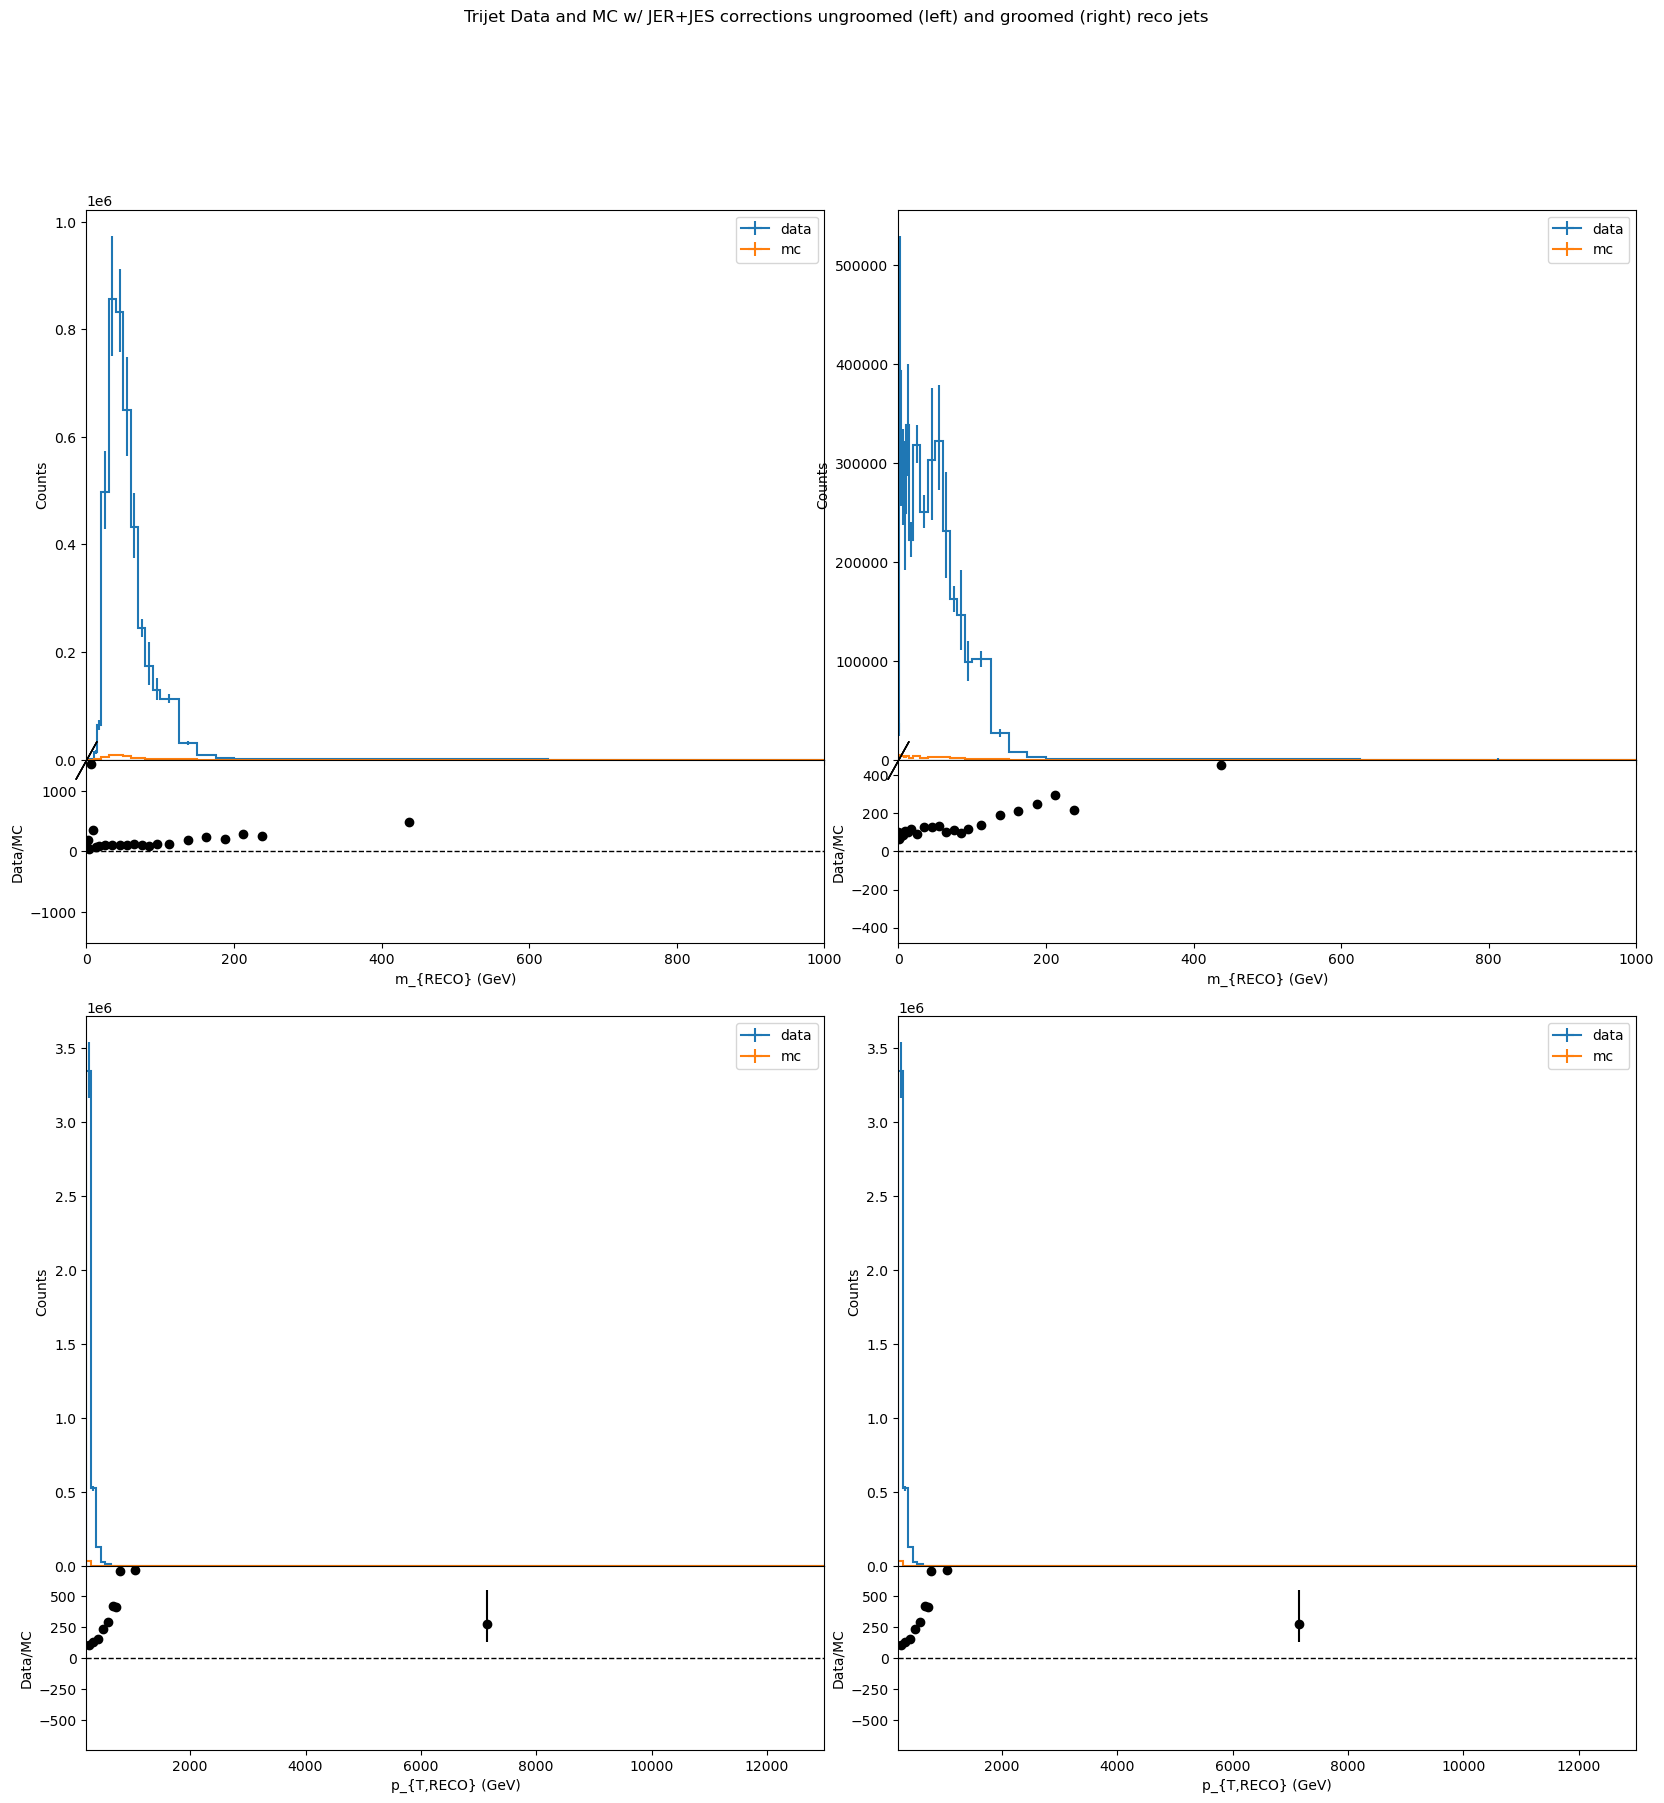

In [11]:
plt.rcParams["figure.figsize"] = (20,20)
fig = plt.figure()
fig.suptitle('Trijet Data and MC w/ JER+JES corrections ungroomed (left) and groomed (right) reco jets')
grids = fig.add_gridspec(2,2, figure=fig, wspace=0.1, hspace=0.1)
subgrids = [grid.subgridspec(4,1, wspace=0, hspace=0) for grid in grids]
mc = [result_mc['jet_pt_mass_reco_u'][{'dataset':sum, 'syst':'nominal'}].project('mreco'), 
                      result_mc['jet_pt_mass_reco_g'][{'dataset':sum, 'syst':'nominal'}].project('mreco'),
             result_mc['jet_pt_mass_reco_u'][{'dataset':sum, 'syst':'nominal'}].project('ptreco'), 
                      result_mc['jet_pt_mass_reco_g'][{'dataset':sum, 'syst':'nominal'}].project('ptreco')]
for i, sg in enumerate(subgrids):
    num = data[i]
    denom = mc[i]
    main_ax = fig.add_subplot(sg[:-1, :])
    # main_ax.set_yscale("log")
    subplot_ax = fig.add_subplot(sg[-1, :], sharex=main_ax)
    plt.setp(main_ax.get_xticklabels(), visible=False)
    main_ax, sublot_ax = num.plot_ratio(denom,
                                              rp_num_label="data",
                                              rp_denom_label="mc",
                                              rp_uncert_draw_type="line",
                                              ax_dict = {"main_ax":main_ax,"ratio_ax":subplot_ax})
    plt.ylabel("Data/MC")
plt.savefig(os_path+"/compareDataMC_wXSscaling_wJERJES.png")

In [12]:
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0_eta2.4_bbloose.pkl"
with open(fname, "rb") as f:
    result = pickle.load( f )
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_bbloosejesjecALL.pkl"
with open(fname, "rb") as f:
    result_jec = pickle.load( f )
os_path = 'plots/comparison/dijet/'
checkdir(os_path)

dict_keys(['jet_mass', 'jet_pt', 'jet_eta', 'btag', 'cutflow', 'njet_gen', 'dphimin_gen', 'asymm_gen', 'njet_reco', 'dphimin_reco', 'asymm_reco', 'jet_dr_reco_gen', 'jet_mass_reco_over_gen', 'jet_pt_reco', 'jet_pt_gen', 'jet_pt_reco_over_gen', 'jet_eta_reco', 'jet_eta_gen', 'jet_rap_reco', 'jet_rap_gen', 'jet_dphi_reco', 'jet_ptasymm_reco', 'jet_dr_gen_subjet', 'jet_dr_reco_to_gen_subjet', 'jet_sd_mass_reco', 'jet_sd_mass_gen', 'misses_g', 'fakes_g', 'misses', 'fakes', 'jet_pt_mass_reco_u', 'jet_pt_mass_reco_g', 'jet_pt_mass_gen_u', 'jet_pt_mass_gen_g', 'jet_m_pt_u_reco_over_gen', 'jet_m_pt_g_reco_over_gen', 'response_matrix_u', 'response_matrix_g', 'weights', 'systematics'])
['dataset', 'syst', 'ptreco', 'mreco']
[(200.0, 280.0), (280.0, 360.0), (360.0, 450.0), (450.0, 520.0), (520.0, 630.0), (630.0, 690.0), (690.0, 750.0), (750.0, 800.0), (800.0, 1300.0), (1300.0, 13000.0)]
3
['nominal', 'jesUp', 'jesDown', 'jerUp', 'jerDown']


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


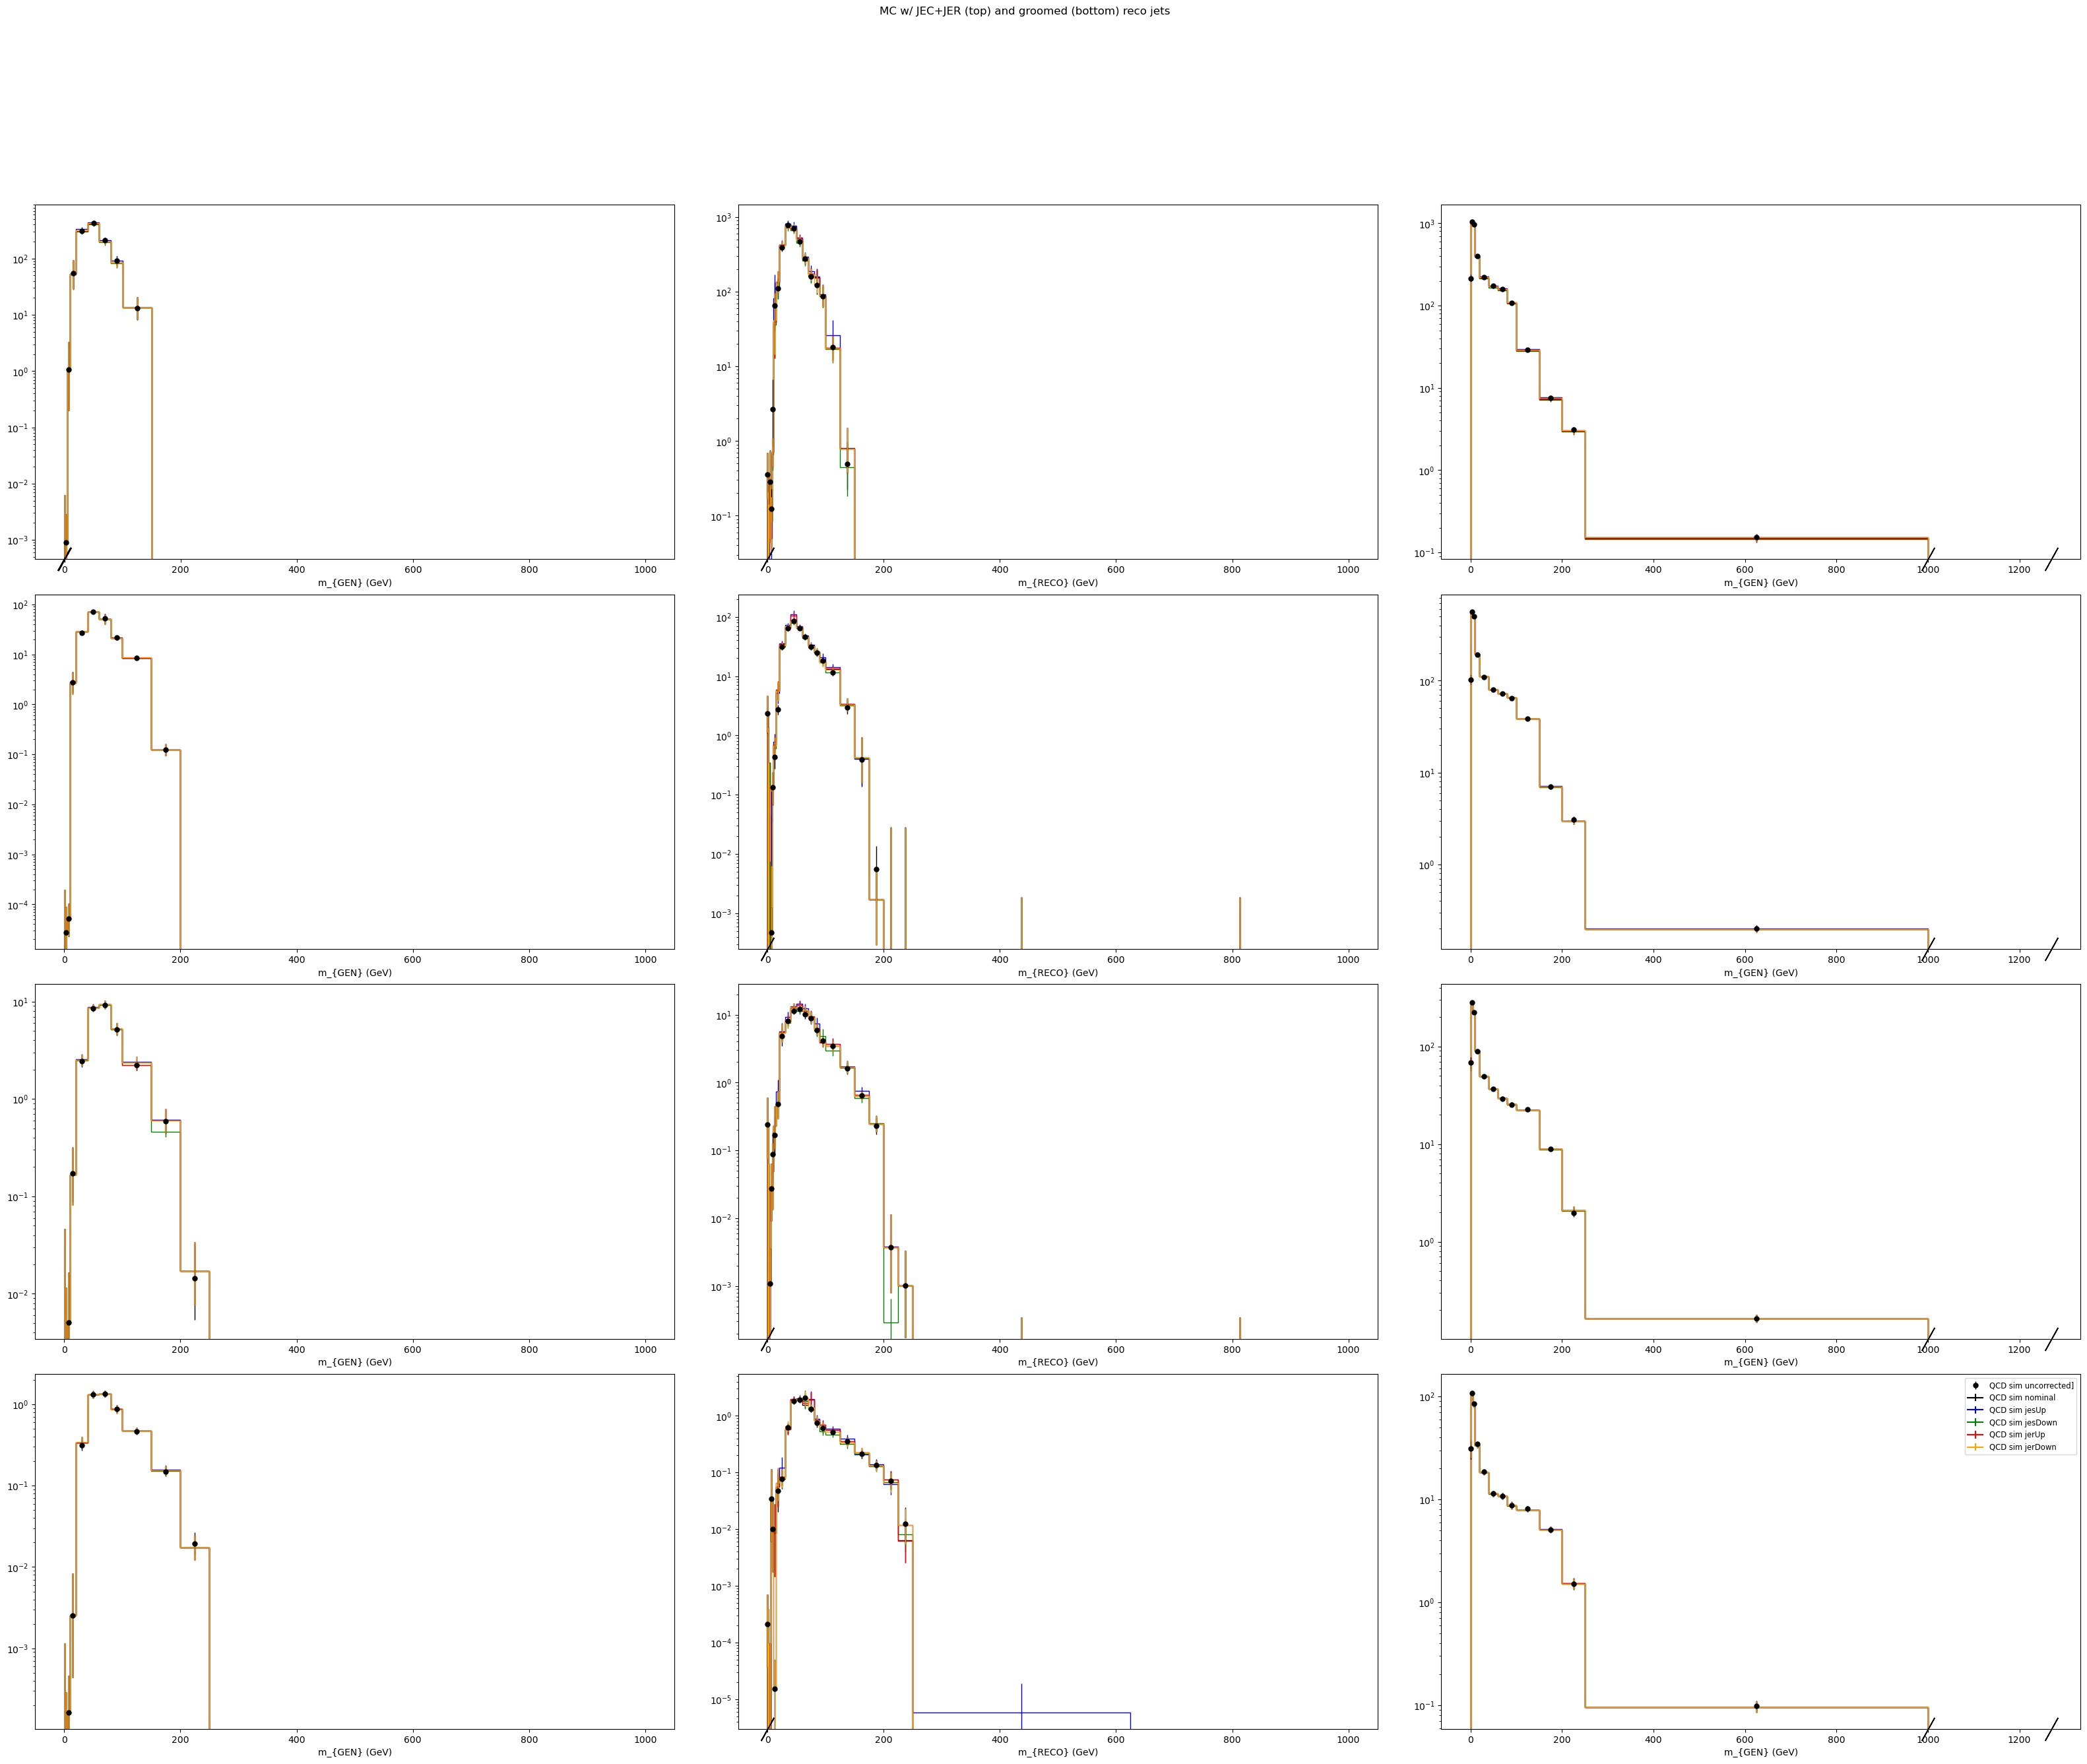

In [13]:
plt.rcParams["figure.figsize"] = (40,30)
print(result_jec.keys())
axis_names = [ax.name for ax in result_jec['jet_pt_mass_reco_u'].axes]
print(axis_names)
cats = [cat for cat in result_jec['jet_pt_mass_reco_u'][{'ptreco':sum, 'dataset':sum, 'mreco':sum}].axes[0]]
pt_bins = [bin for bin in result_jec['jet_pt_mass_reco_u'].project("ptreco").axes[0]]
print(pt_bins)
fig, axs = plt.subplots(4, 3)
print(len(axs[0]))
colors = ['k', 'b', 'g', 'r', 'orange']
print(cats)
fig.suptitle('MC w/ JEC+JER (top) and groomed (bottom) reco jets')
# mc = [result['jet_pt_mass_reco_u'][{'dataset':sum}].project('ptreco'), 
#       result['jet_pt_mass_reco_u'][{'dataset':sum}].project('mreco'), 
#       result['jet_pt_mass_reco_g'][{'dataset':sum}].project('ptreco'), 
#       result['jet_pt_mass_reco_g'][{'dataset':sum}].project('mreco')]
for j, ax in enumerate(axs):
    mc = [result['response_matrix_u'][{'dataset':sum, 'ptgen':j}].project('mgen'), 
      result['response_matrix_u'][{'dataset':sum, 'ptreco':j}].project('mreco'), 
      result['response_matrix_g'][{'dataset':sum, 'ptgen':j}].project('mgen'), 
      result['response_matrix_g'][{'dataset':sum, 'ptreco':j}].project('mreco')]
    for i in range(len(axs[0])):
        hep.histplot(mc[i], stack=False, histtype='errorbar', binwnorm=1,
                         ax=axs[j,i], density=False, marker =["."], color = 'black', linewidth=1,
                         label=['QCD sim uncorrected]'])
        for id, syst in enumerate(cats):
            mc_jec = [result_jec['response_matrix_u'][{'dataset':sum, 'syst':syst, 'ptgen':j}].project('mgen'), 
                      result_jec['jet_pt_mass_reco_u'][{'dataset':sum, 'syst':syst, 'ptreco':j}].project('mreco'), 
                      result_jec['response_matrix_g'][{'dataset':sum, 'syst':syst, 'ptgen':j}].project('mgen'), 
                      result_jec['jet_pt_mass_reco_g'][{'dataset':sum, 'syst':syst, 'ptreco':j}].project('mreco')]
            hep.histplot(mc_jec[i], stack=True, histtype='step', binwnorm=1,
                             ax=axs[j,i], density=False, linestyle =["-"],
                             color = colors[id], linewidth=1,
                             label=['QCD sim '+syst])
    plt.rc('legend',fontsize='small')
    plt.legend()

for ax in axs.flatten():
    ax.set_yscale('log')

plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.savefig(os_path+"/jesjecComparison_MC.png")

In [14]:
import matplotlib.pyplot as plt
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_bloosejesjec2016.pkl"
with open(fname, "rb") as f:
    result_bloose = pickle.load( f )
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_bbloosejesjec2016.pkl"
with open(fname, "rb") as f:
    result_bbloose = pickle.load( f )
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_bbmedjesjec2016.pkl"
with open(fname, "rb") as f:
    result_bbmed = pickle.load( f )
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_bmedjesjec2016.pkl"
with open(fname, "rb") as f:
    result_bmed = pickle.load( f )
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_Nonejesjec2016.pkl"
with open(fname, "rb") as f:
    result_nobtag = pickle.load( f )
os_path = 'plots/comparison/trijet/'
checkdir(os_path)
print("Gluon purity bbloose ", result_bbloose['cutflow']['nGluonJets']/result_bbloose['cutflow']['n3Jets'])
print("Gluon purity bloose ", result_bloose['cutflow']['nGluonJets']/result_bloose['cutflow']['n3Jets'])
print("Gluon purity bbmed ", result_bbmed['cutflow']['nGluonJets']/result_bbmed['cutflow']['n3Jets'])
print("Gluon purity bmed ", result_bmed['cutflow']['nGluonJets']/result_bmed['cutflow']['n3Jets'])
print("Gluon purity no btag ", result_nobtag['cutflow']['nSoftestGluonJets']/result_nobtag['cutflow']['n3Jets'])
print(result_nobtag['cutflow'].keys())

Gluon purity bbloose  0.5067628381419071
Gluon purity bloose  0.5149309400762889
Gluon purity bbmed  0.49558243849395134
Gluon purity bmed  0.5032023828407268
Gluon purity no btag  0.518544048922637
dict_keys(['nEvents initial', 'nEvents2016/QCD_Pt_1000to1400_TuneCP5_13TeV_pythia8/RunIISummer20UL16NanoAODv9-106X_mcRun2_asymptotic_v17-v1/NANOAODSIM', 'nEvents after >2 jet, rapidity, and pT selection nominal', 'nEvents after gen dphi and ptasymm selection nominal', 'nEvents after nominal', 'misses', 'nEvents after reco kine selection nominal', 'nEvents after reco topo selection nominal', 'nEvents after reco btag nominal', 'fakes nominal', 'nEvents after gen matching nominal', 'Number of outliers nominal', 'nGluonJets', 'nJets', 'nSoftestGluonJets', 'nSoftestGluonJets_b', 'nSoftestGluonJets_bb', 'nSoftestJets_b', 'nSoftestJets_bb', 'n3Jets', 'nEvents final selection', 'nEvents after >2 jet, rapidity, and pT selection jesUp', 'nEvents after gen dphi and ptasymm selection jesUp', 'nEvents a

<Figure size 2000x2000 with 0 Axes>

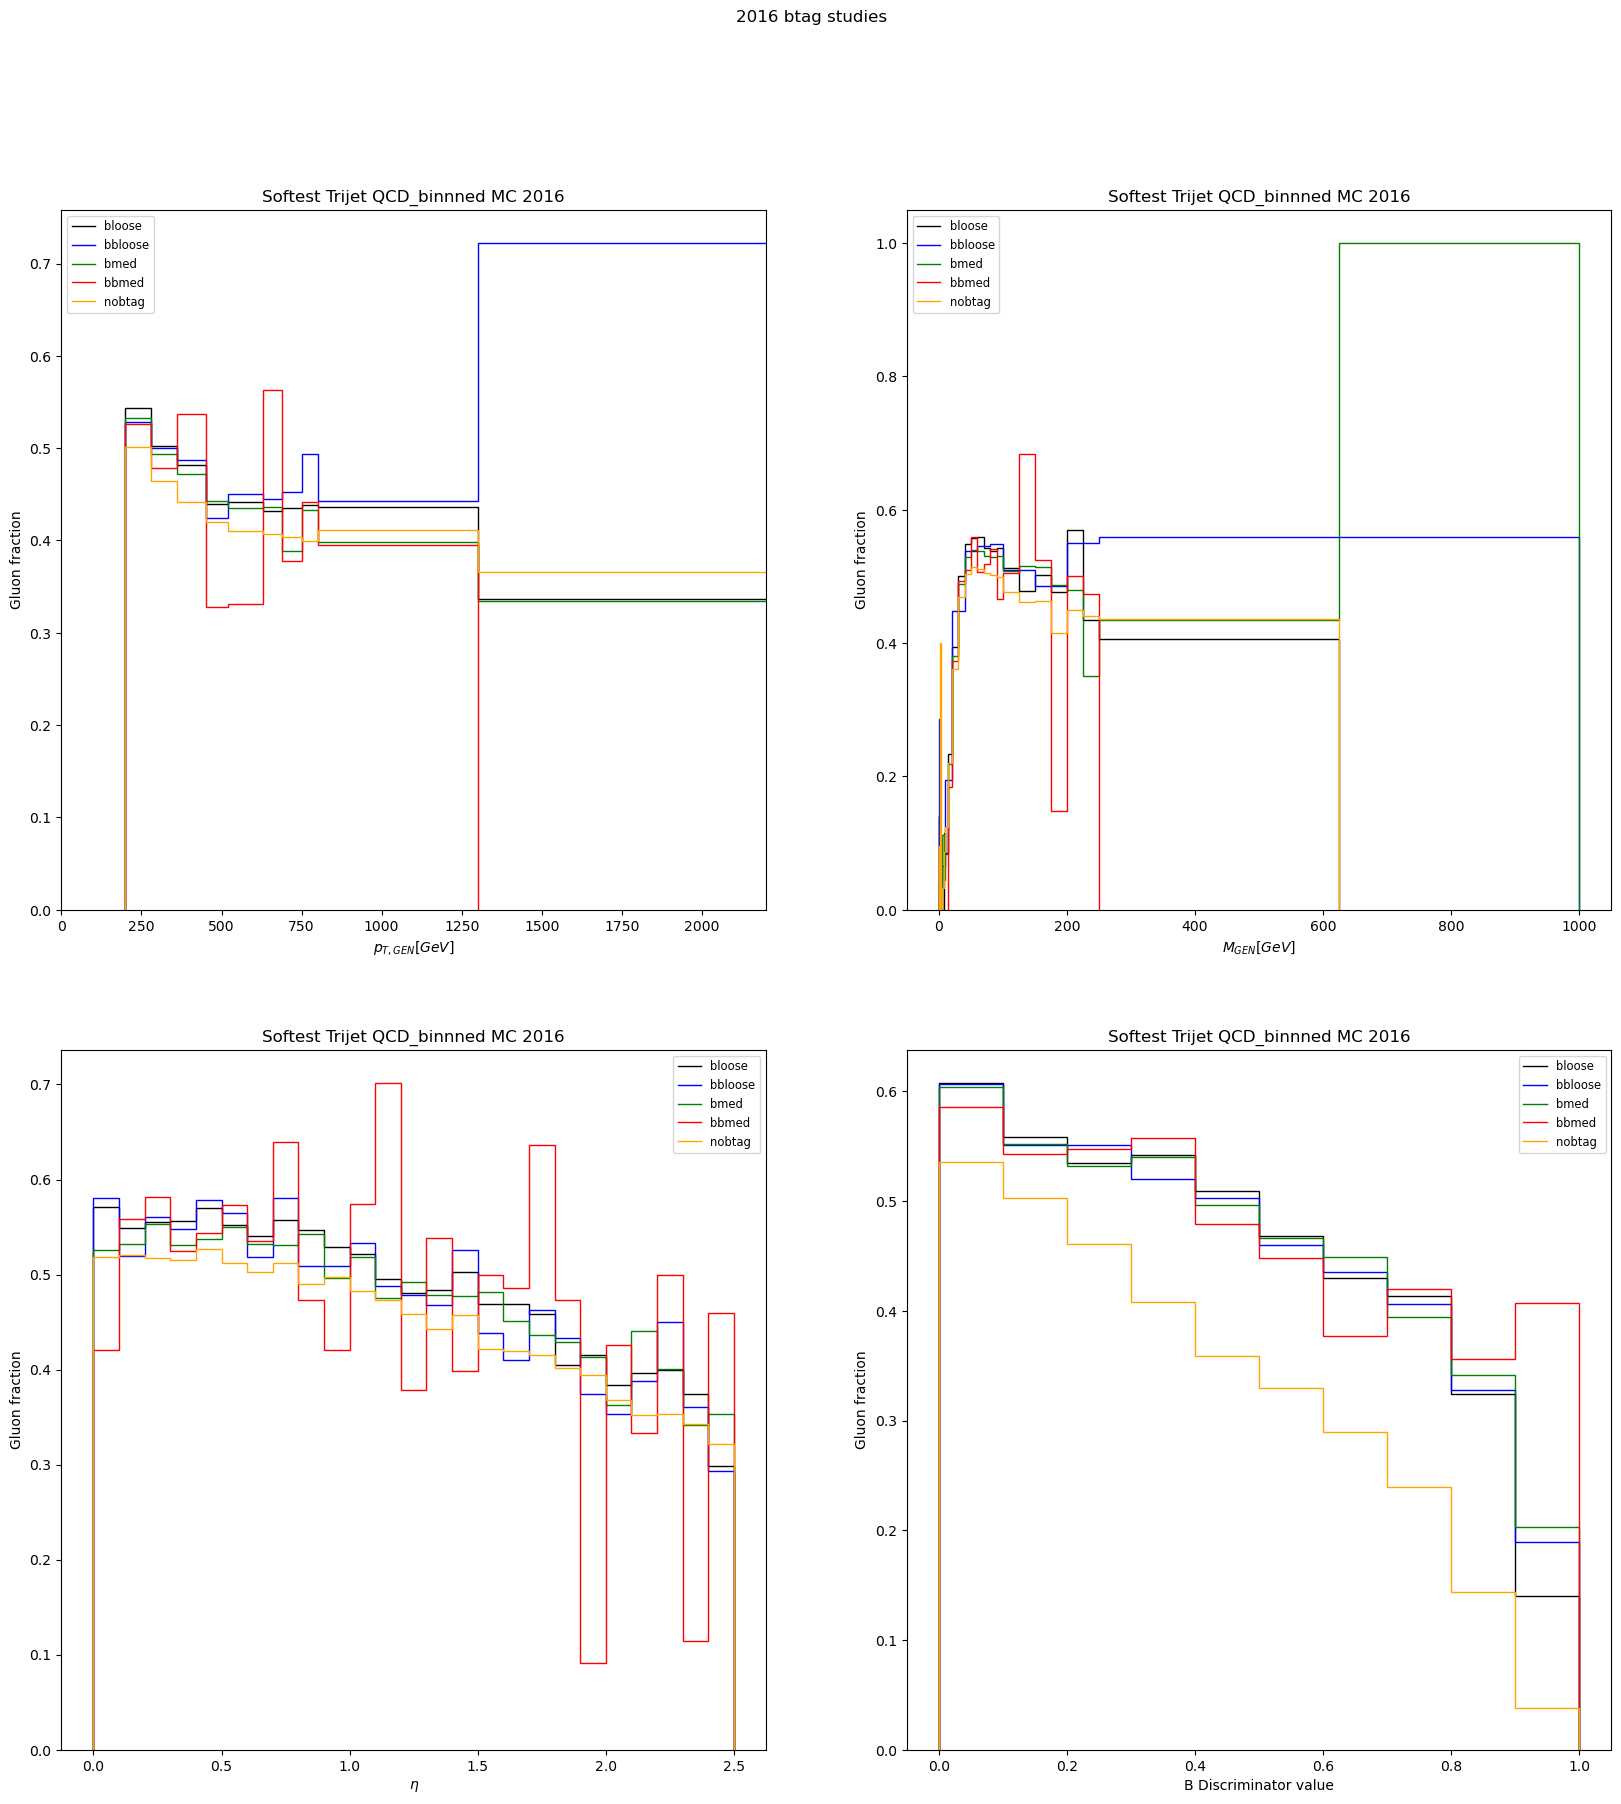

In [15]:
#### B TAG PLOTS OLD WAY
bloose_num = [result_bloose['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptreco'), 
               result_bloose['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('mreco'), 
               result_bloose['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('eta'), 
               result_bloose['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('frac') ]
bloose_denom = [result_bloose['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptreco'), 
                 result_bloose['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mreco'), 
                 result_bloose['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_bloose['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
bbloose_num = [result_bbloose['jet_pt'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptgen'), 
               result_bbloose['jet_mass'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('mgen'), 
               result_bbloose['jet_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('eta'), 
               result_bbloose['btag'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('frac') ]
bbloose_denom = [result_bbloose['jet_pt'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptgen'), 
                 result_bbloose['jet_mass'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mgen'), 
                 result_bbloose['jet_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_bbloose['btag'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
bbmed_num = [result_bbmed['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptreco'), 
               result_bbmed['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('mreco'), 
               result_bbmed['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('eta'), 
               result_bbmed['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('frac') ]
bbmed_denom = [result_bbmed['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptreco'), 
                 result_bbmed['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mreco'), 
                 result_bbmed['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_bbmed['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
bmed_num = [result_bmed['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptreco'), 
               result_bmed['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('mreco'), 
               result_bmed['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('eta'), 
               result_bmed['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('frac') ]
bmed_denom = [result_bmed['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptreco'), 
                 result_bmed['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mreco'), 
                 result_bmed['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_bmed['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
nobtag_num = [result_nobtag['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptreco'), 
               result_nobtag['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('mreco'), 
               result_nobtag['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('eta'), 
               result_nobtag['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('frac') ]
nobtag_denom = [result_nobtag['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptreco'), 
                 result_nobtag['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mreco'), 
                 result_nobtag['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_nobtag['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
def plotratio_cms(num, denom, ax, color, label):
    ratio = num.values() /  denom.values()
    ratio[ratio == 0] = np.nan
    ratio[np.isinf(ratio)] = np.nan
    hep.histplot(ratio, bins = num.axes.edges[0], stack=False, histtype='step',
                         ax=ax, density=False, linestyle =["-"], color = color, linewidth=1,
                         label=[label])
nums = [bloose_num, bbloose_num, bmed_num, bbmed_num, nobtag_num]
denoms = [bloose_denom, bbloose_denom, bmed_denom, bbmed_denom, nobtag_denom]
btag_names = ['bloose', 'bbloose', 'bmed', 'bbmed', 'nobtag']
plt.rcParams["figure.figsize"] = (20,20)
plt.rc('legend',fontsize='small')
fig = plt.figure()
fig, axs = plt.subplots(2, 2)
fig.suptitle('2016 btag studies')
colors = ['k', 'b', 'g', 'r', 'orange', 'c', 'm']
xlabels = ['$p_{T, GEN} [GeV]$', '$M_{GEN} [GeV]$', '$\eta$', 'B Discriminator value']
for j in range(len(btag_names)):
    for i, ax in enumerate(axs.flatten()):
        plotratio_cms(nums[j][i], denoms[j][i], axs.flatten()[i], colors[j], btag_names[j])
        ax.set_title("Softest Trijet QCD_binnned MC 2016")
        ax.set_xlabel(xlabels[i])
        ax.set_ylabel("Gluon fraction")
        ax.legend()
axs.flatten()[0].set_xlim([0,2200])
plt.savefig(os_path+"/btagComparison2016.png")

<Figure size 2000x2000 with 0 Axes>

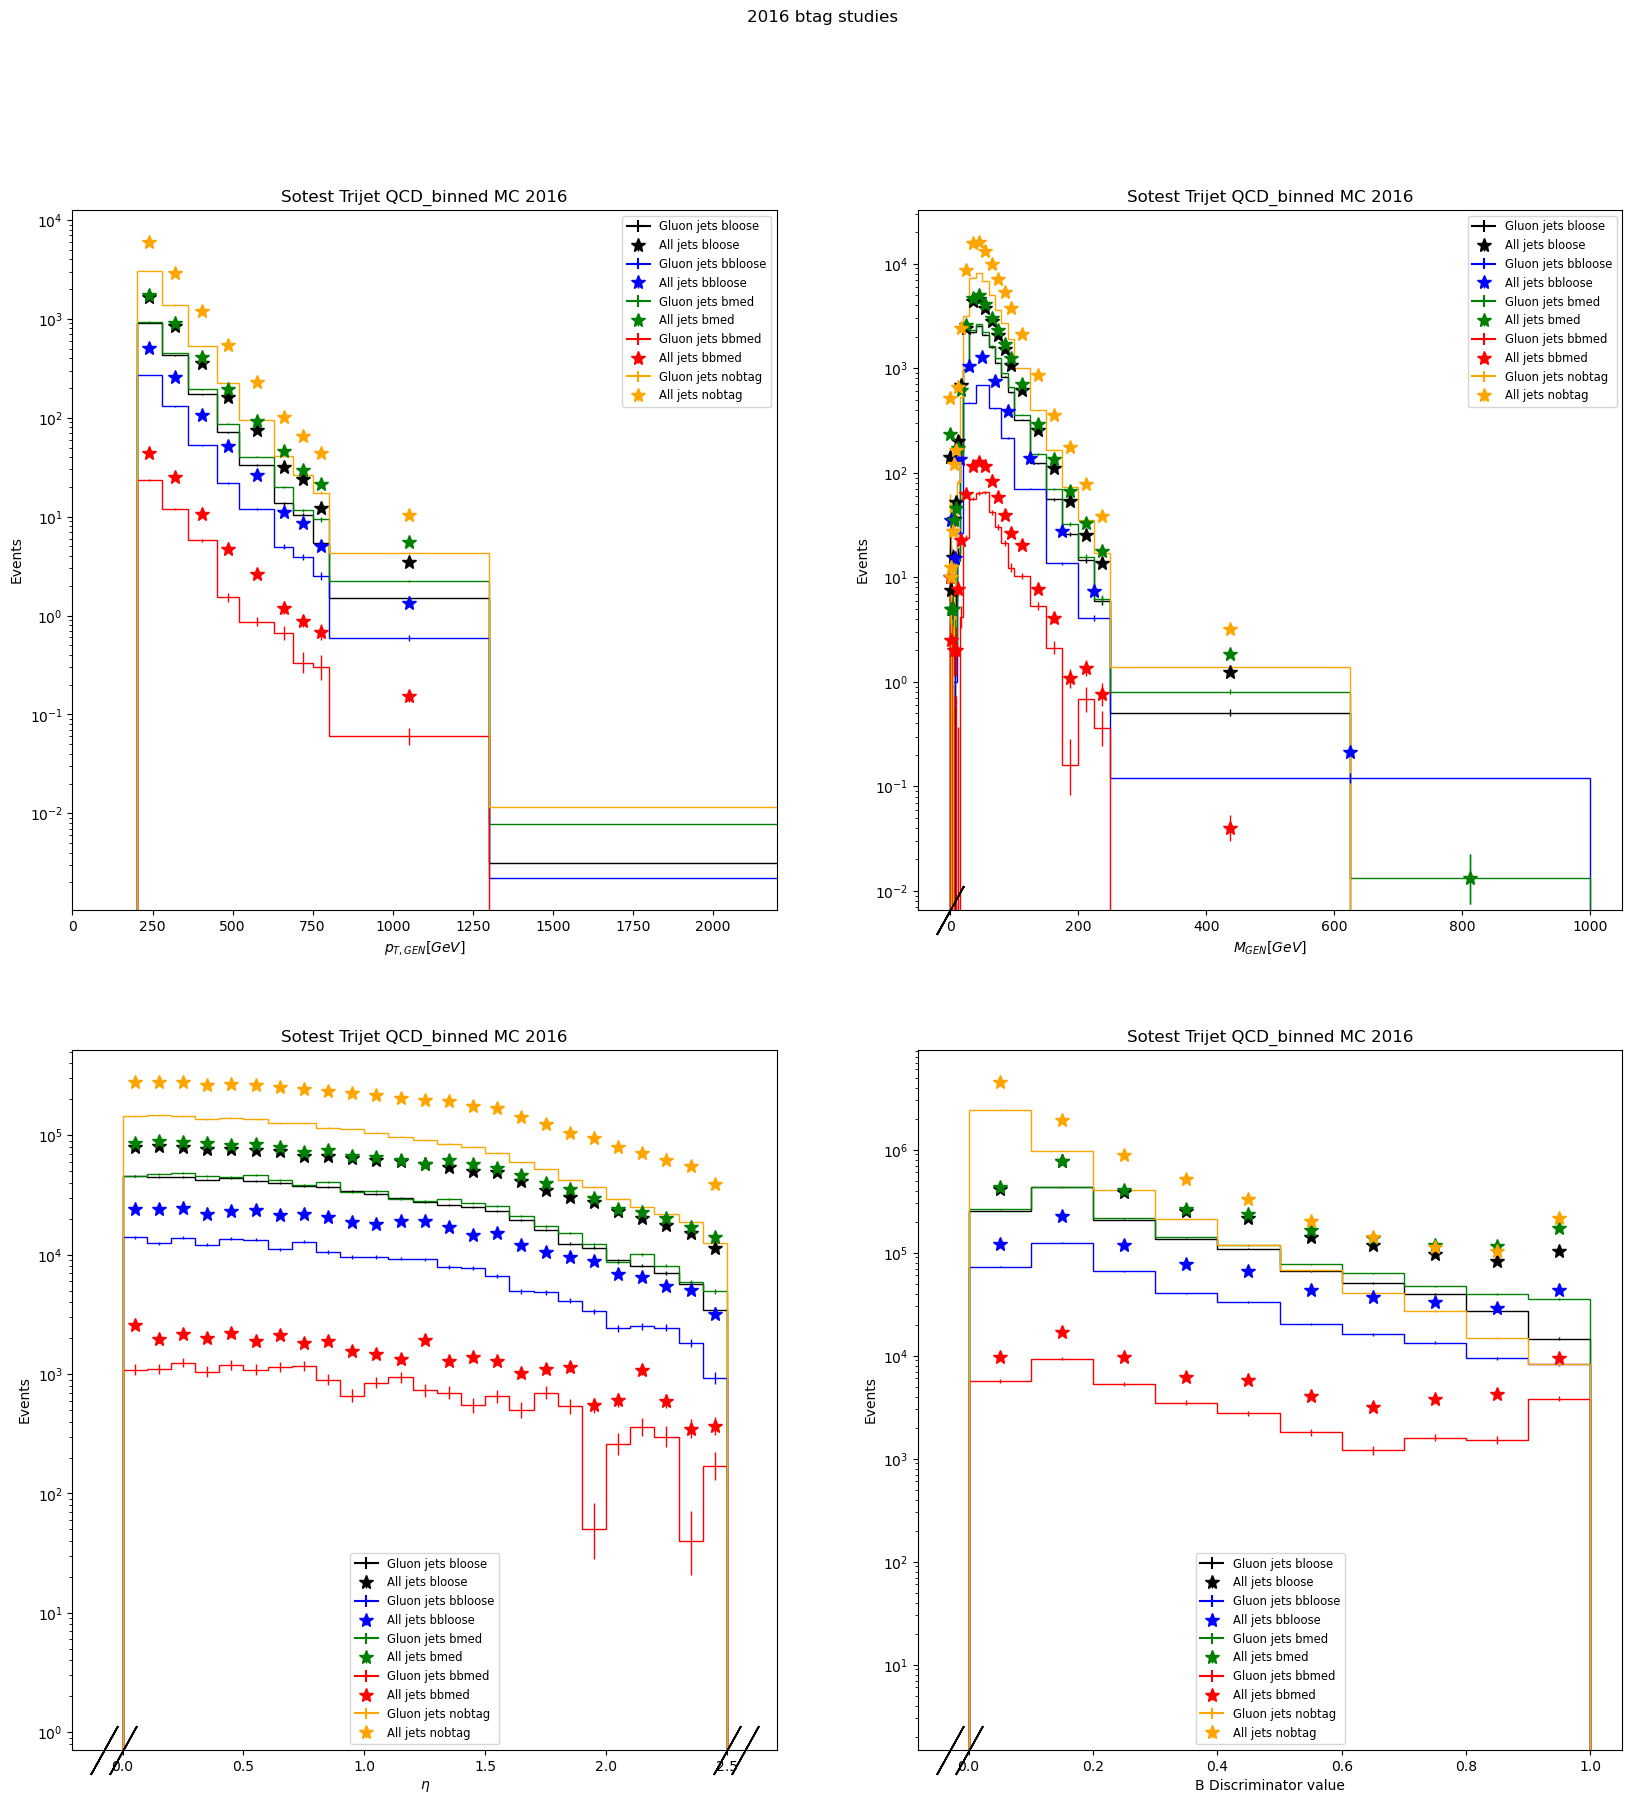

In [16]:
plt.rcParams["figure.figsize"] = (20,20)
plt.rc('legend',fontsize='small')
fig = plt.figure()
fig, axs = plt.subplots(2, 2)
fig.suptitle('2016 btag studies')
for j in range(len(btag_names)):
    for i, ax in enumerate(axs.flatten()):
        hep.histplot(nums[j][i], stack=False, histtype='step', binwnorm=1,
                         ax=ax, density=False, linestyle =["-"], color = colors[j], linewidth=1,
                         label=['Gluon jets '+btag_names[j]])
        hep.histplot(denoms[j][i], stack=False, histtype='errorbar', binwnorm=1,
                         ax=ax, density=False, marker =["*"], color = colors[j],
                         label=['All jets '+btag_names[j]])
        ax.set_title("Sotest Trijet QCD_binned MC 2016")
        ax.set_yscale('log')
        ax.set_xlabel(xlabels[i])
        ax.set_ylabel("Events")
        ax.legend()
axs.flatten()[0].set_xlim([0,2200])
plt.savefig(os_path+"/btaggedJets2016.png")

In [17]:
import matplotlib.pyplot as plt
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_bloosejesjec2017.pkl"
with open(fname, "rb") as f:
    result_bloose = pickle.load( f )
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_bbloosejesjec2017.pkl"
with open(fname, "rb") as f:
    result_bbloose = pickle.load( f )
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_bbmedjesjec2017.pkl"
with open(fname, "rb") as f:
    result_bbmed = pickle.load( f )
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_bmedjesjec2017.pkl"
with open(fname, "rb") as f:
    result_bmed = pickle.load( f )
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_Nonejesjec2017.pkl"
with open(fname, "rb") as f:
    result_nobtag = pickle.load( f )
os_path = 'plots/comparison/trijet/'
checkdir(os_path)
print("Gluon purity bbloose ", result_bbloose['cutflow']['nGluonJets']/result_bbloose['cutflow']['n3Jets'])
print("Gluon purity bloose ", result_bloose['cutflow']['nGluonJets']/result_bloose['cutflow']['n3Jets'])
print("Gluon purity bbmed ", result_bbmed['cutflow']['nGluonJets']/result_bbmed['cutflow']['n3Jets'])
print("Gluon purity bmed ", result_bmed['cutflow']['nGluonJets']/result_bmed['cutflow']['n3Jets'])
print("Gluon purity nobtag ", result_nobtag['cutflow']['nSoftestGluonJets']/result_nobtag['cutflow']['n3Jets'])
print("Gluon purity all jets ", result_nobtag['cutflow']['nSoftestJets']/(result_nobtag['cutflow']['nJets']))
print(result_nobtag['cutflow'].keys())

Gluon purity bbloose  0.508305105814351
Gluon purity bloose  0.5158751298900873
Gluon purity bbmed  0.5022605836415948
Gluon purity bmed  0.5114297136211658
Gluon purity nobtag  0.5173591840110665
Gluon purity all jets  0.4353623174507658
dict_keys(['nEvents initial', 'nEvents2017/QCD_Pt_1000to1400_TuneCP5_13TeV_pythia8/RunIISummer20UL17NanoAODv9-106X_mc2017_realistic_v9-v1/NANOAODSIM', 'misses', 'nSoftestJets', 'nJetsFJ', 'nJets', 'nSoftestGluonJets', 'n3Jets', 'nEvents final selection', 'chunks', 'nEvents2017/QCD_Pt_1400to1800_TuneCP5_13TeV_pythia8/RunIISummer20UL17NanoAODv9-106X_mc2017_realistic_v9-v1/NANOAODSIM', 'nEvents2017/QCD_Pt_600to800_TuneCP5_13TeV_pythia8/RunIISummer20UL17NanoAODv9-106X_mc2017_realistic_v9-v1/NANOAODSIM', 'nEvents2017/QCD_Pt_800to1000_TuneCP5_13TeV_pythia8/RunIISummer20UL17NanoAODv9-106X_mc2017_realistic_v9-v1/NANOAODSIM', 'nEvents2017/QCD_Pt_470to600_TuneCP5_13TeV_pythia8/RunIISummer20UL17NanoAODv9-106X_mc2017_realistic_v9-v1/NANOAODSIM', 'nEvents2017/QCD_

<Figure size 2000x2000 with 0 Axes>

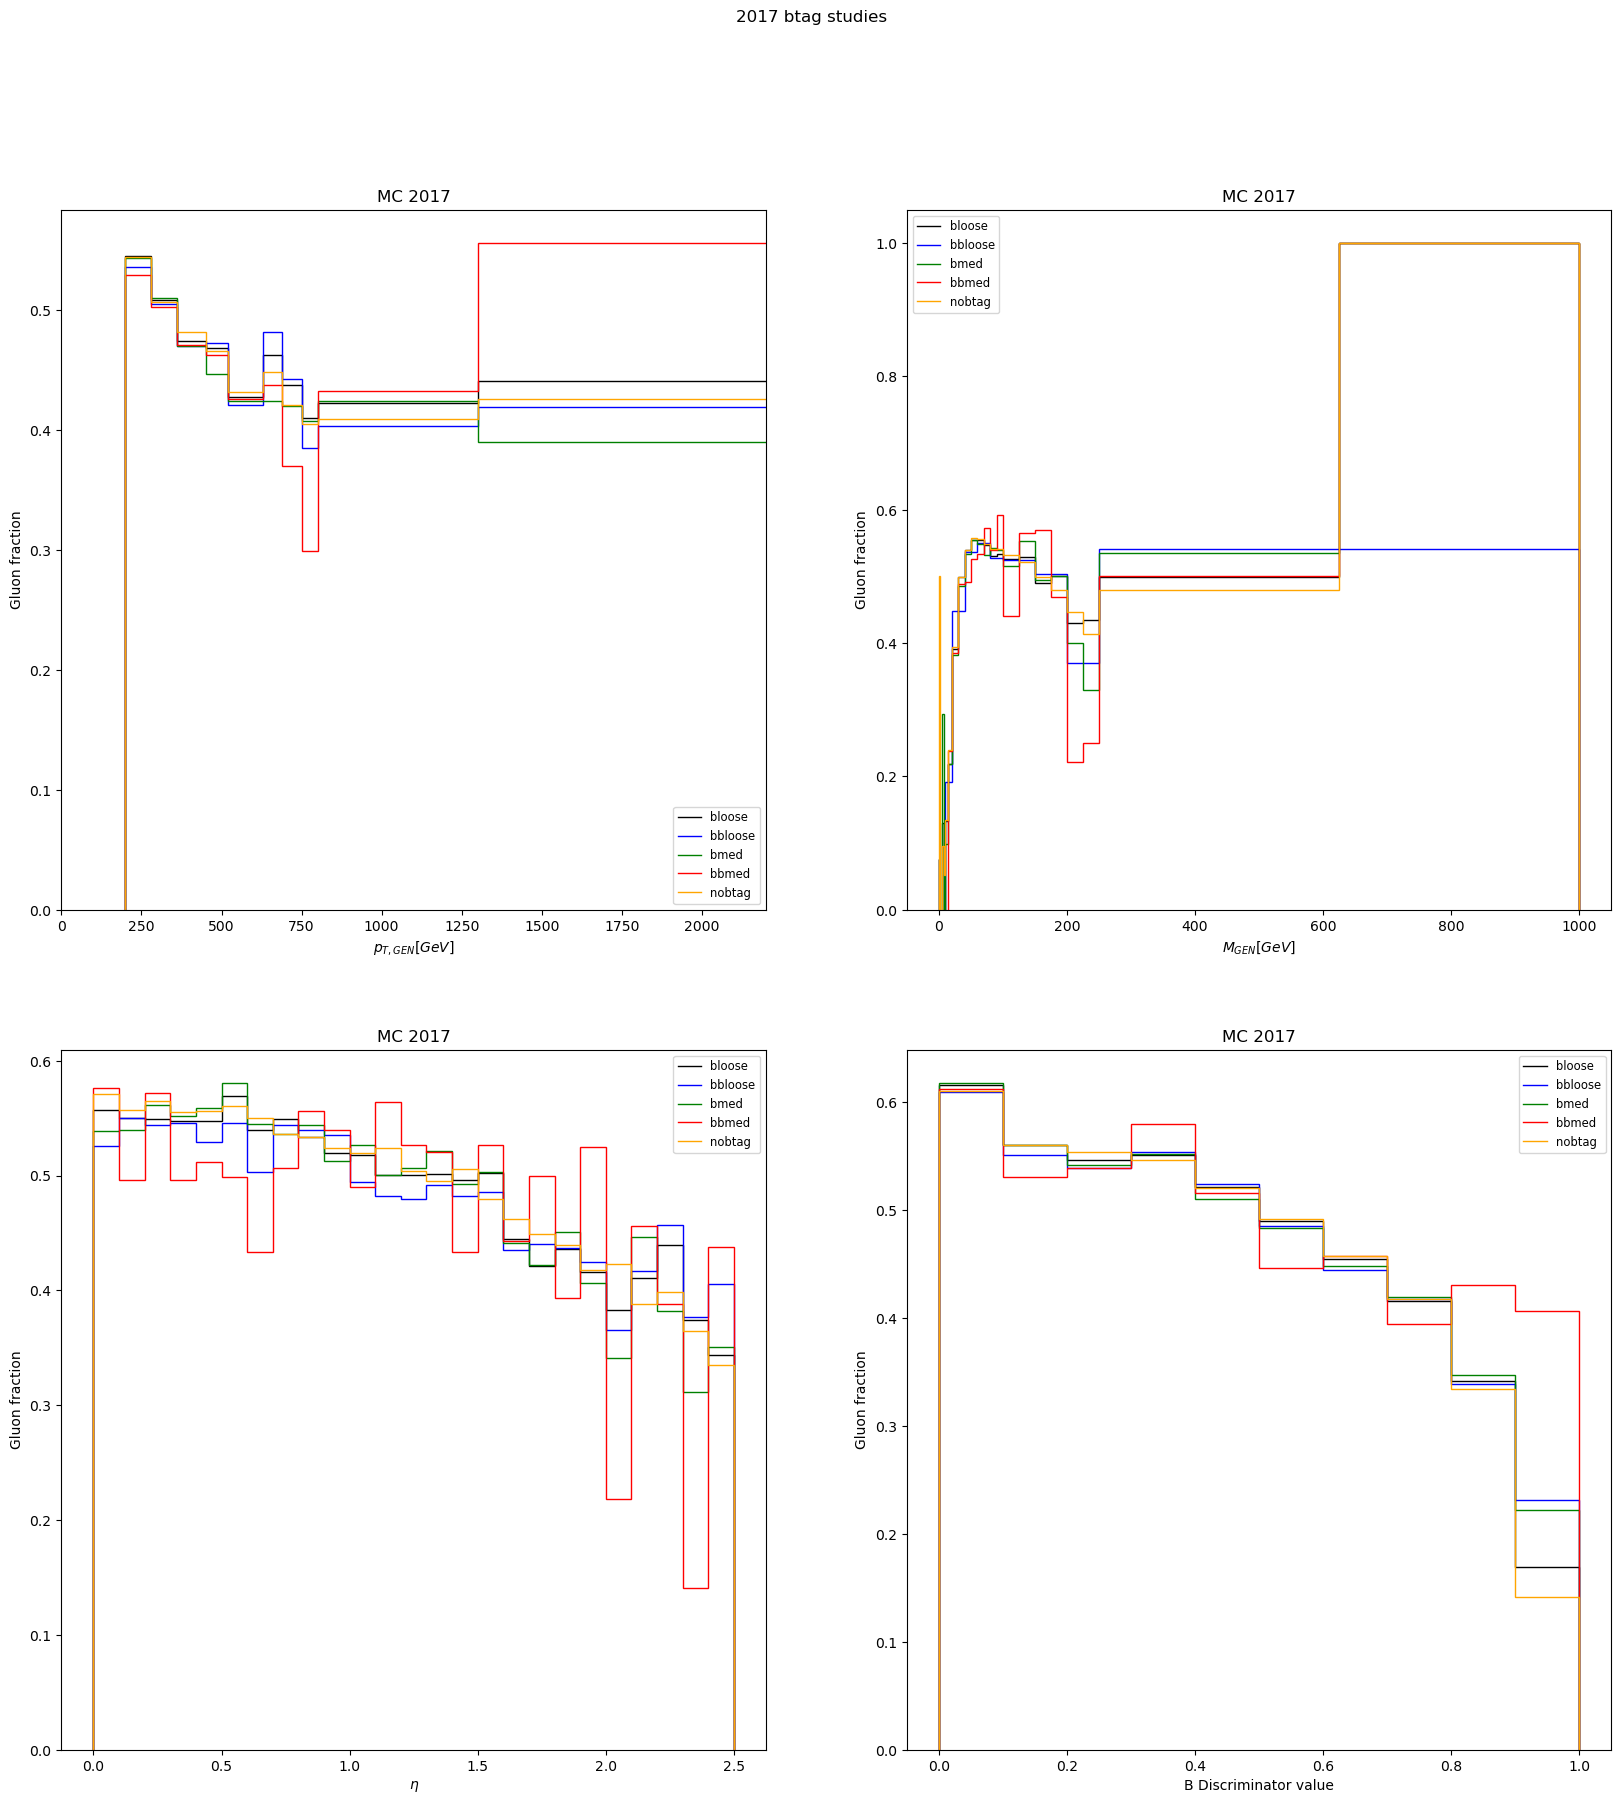

In [18]:
#### B TAG PLOTS OLD WAY
bloose_num = [result_bloose['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptreco'), 
               result_bloose['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('mreco'), 
               result_bloose['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('eta'), 
               result_bloose['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('frac') ]
bloose_denom = [result_bloose['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptreco'), 
                 result_bloose['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mreco'), 
                 result_bloose['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_bloose['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
bbloose_num = [result_bbloose['jet_pt'][{'partonFlav':"Gluon", 'jetNumb':'jet3'}].project('ptgen'), 
               result_bbloose['jet_mass'][{'partonFlav':"Gluon", 'jetNumb':'jet3'}].project('mgen'), 
               result_bbloose['jet_eta'][{'partonFlav':"Gluon", 'jetNumb':'jet3'}].project('eta'), 
               result_bbloose['btag'][{'partonFlav':"Gluon", 'jetNumb':'jet3'}].project('frac') ]
bbloose_denom = [result_bbloose['jet_pt'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptgen'), 
                 result_bbloose['jet_mass'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mgen'), 
                 result_bbloose['jet_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_bbloose['btag'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
bbmed_num = [result_bbmed['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptreco'), 
               result_bbmed['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('mreco'), 
               result_bbmed['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('eta'), 
               result_bbmed['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('frac') ]
bbmed_denom = [result_bbmed['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptreco'), 
                 result_bbmed['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mreco'), 
                 result_bbmed['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_bbmed['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
bmed_num = [result_bmed['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptreco'), 
               result_bmed['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('mreco'), 
               result_bmed['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('eta'), 
               result_bmed['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('frac') ]
bmed_denom = [result_bmed['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptreco'), 
                 result_bmed['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mreco'), 
                 result_bmed['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_bmed['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
nobtag_num = [result_nobtag['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptreco'), 
               result_nobtag['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('mreco'), 
               result_nobtag['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('eta'), 
               result_nobtag['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('frac') ]
nobtag_denom = [result_nobtag['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptreco'), 
                 result_nobtag['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mreco'), 
                 result_nobtag['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_nobtag['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
nums = [bloose_num, bbloose_num, bmed_num, bbmed_num, nobtag_num]
denoms = [bloose_denom, bbloose_denom, bmed_denom, bbmed_denom, nobtag_denom]
btag_names = ['bloose', 'bbloose', 'bmed', 'bbmed', 'nobtag']
plt.rcParams["figure.figsize"] = (20,20)
plt.rc('legend',fontsize='small')
fig = plt.figure()
fig, axs = plt.subplots(2, 2)
fig.suptitle('2017 btag studies')
colors = ['k', 'b', 'g', 'r', 'orange', 'c', 'm']
xlabels = ['$p_{T, GEN} [GeV]$', '$M_{GEN} [GeV]$', '$\eta$', 'B Discriminator value']
for j in range(len(btag_names)):
    for i, ax in enumerate(axs.flatten()):
        plotratio_cms(nums[j][i], denoms[j][i], axs.flatten()[i], colors[j], btag_names[j])
        ax.set_title("MC 2017")
        ax.set_xlabel(xlabels[i])
        ax.set_ylabel("Gluon fraction")
        ax.legend()
axs.flatten()[0].set_xlim([0,2200])
plt.savefig(os_path+"/btagComparison2017.png")

<Figure size 2000x2000 with 0 Axes>

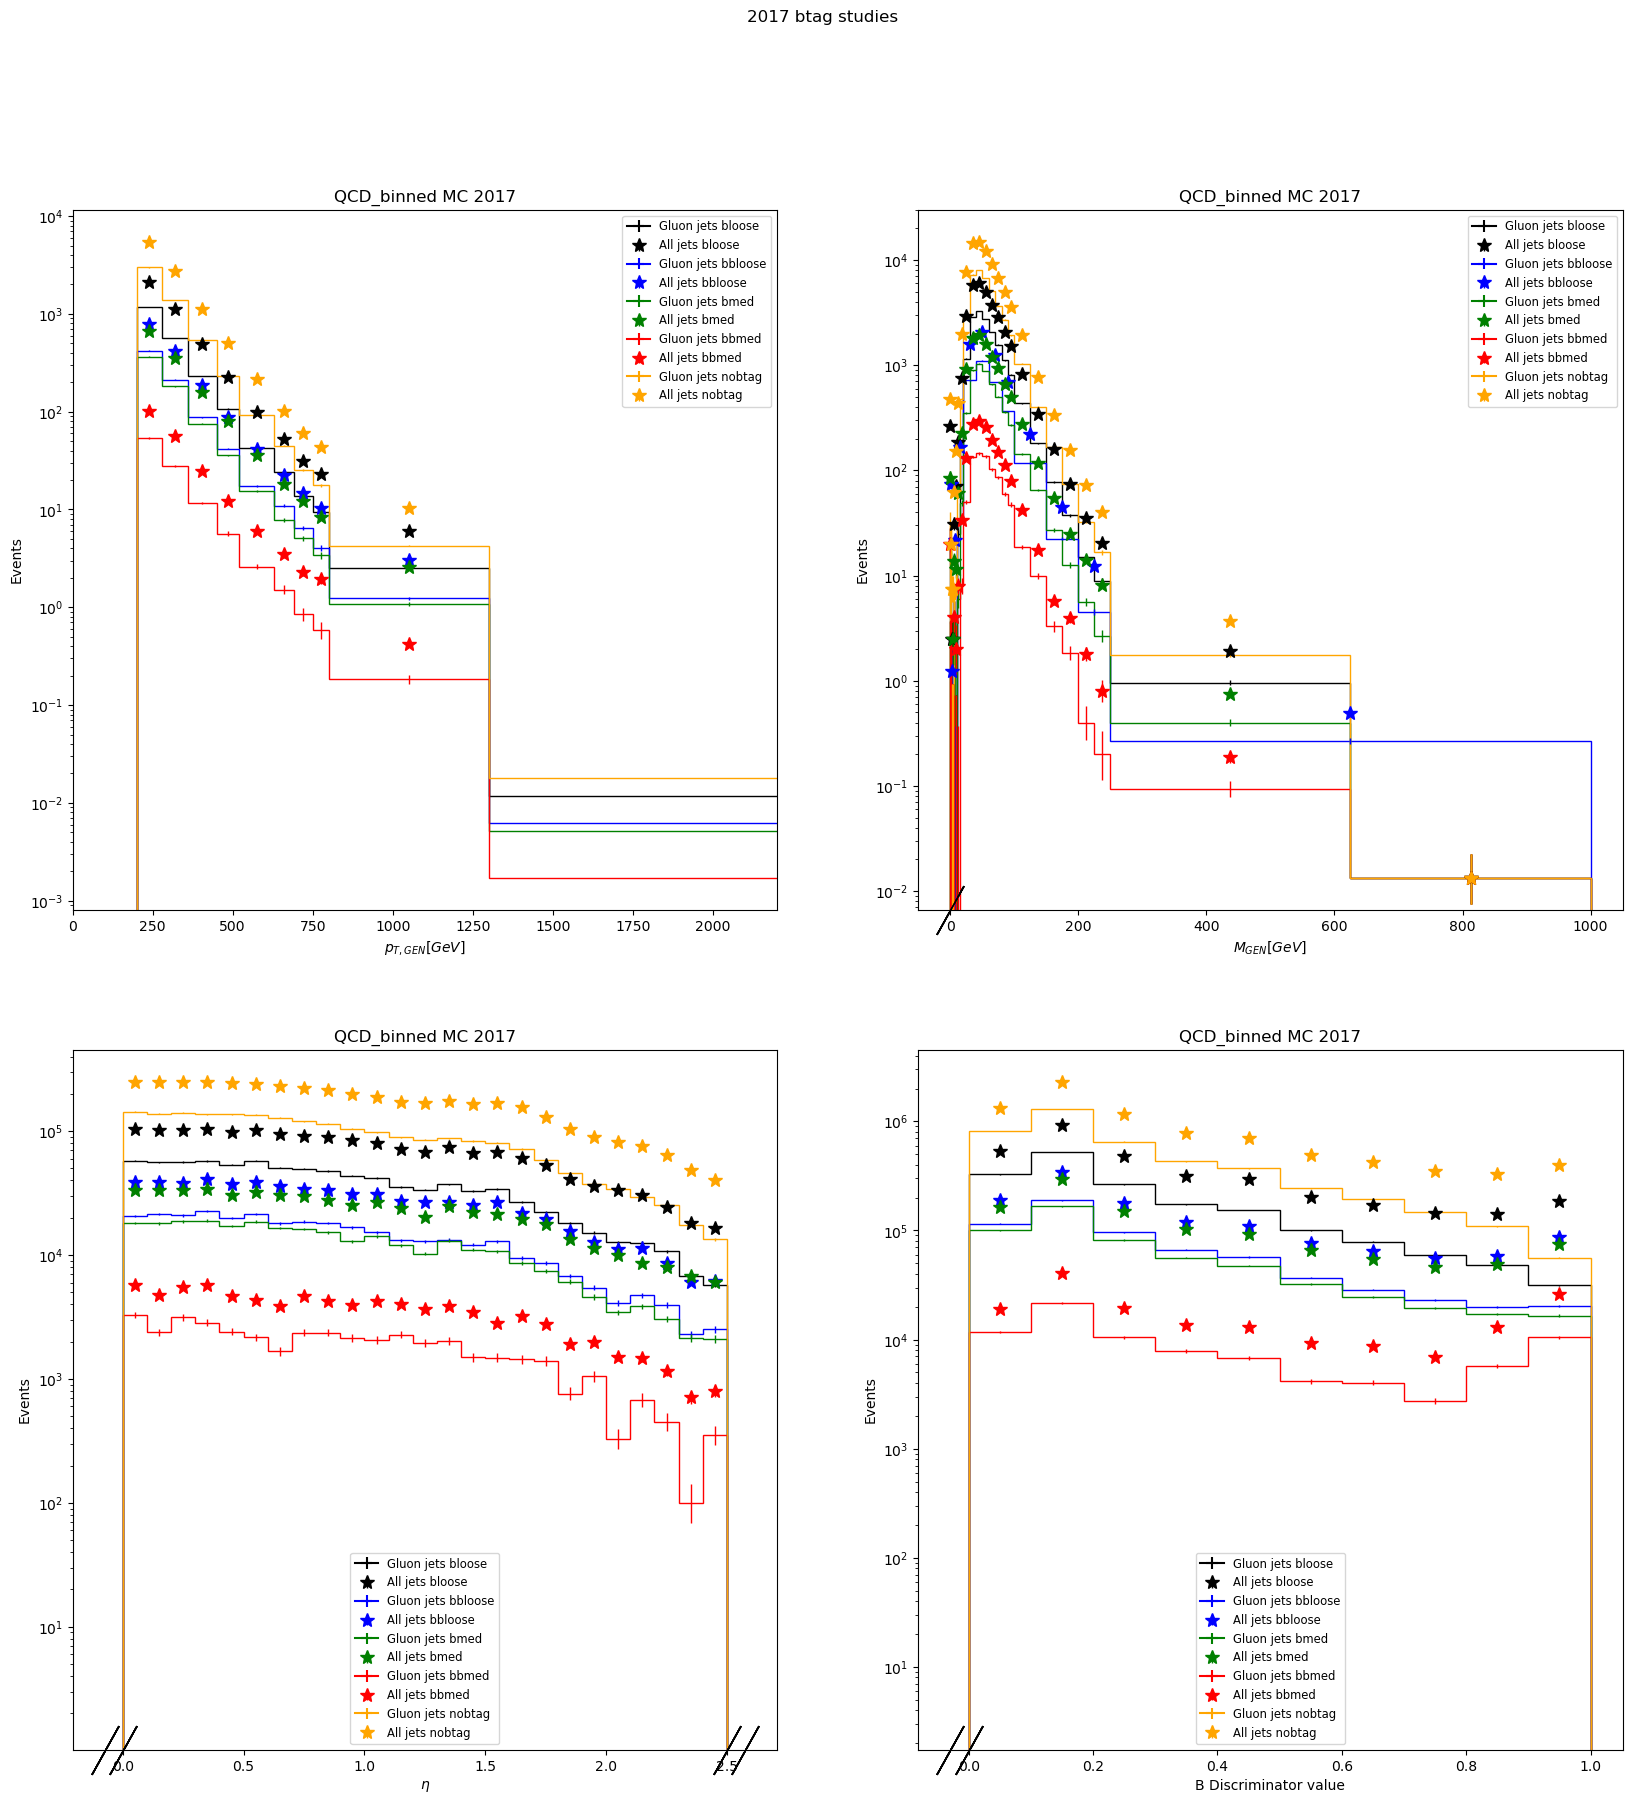

In [19]:
plt.rcParams["figure.figsize"] = (20,20)
plt.rc('legend',fontsize='small')
fig = plt.figure()
fig, axs = plt.subplots(2, 2)
fig.suptitle('2017 btag studies')
for j in range(len(btag_names)):
    for i, ax in enumerate(axs.flatten()):
        hep.histplot(nums[j][i], stack=False, histtype='step', binwnorm=1,
                         ax=ax, density=False, linestyle =["-"], color = colors[j], linewidth=1,
                         label=['Gluon jets '+btag_names[j]])
        hep.histplot(denoms[j][i], stack=False, histtype='errorbar', binwnorm=1,
                         ax=ax, density=False, marker =["*"], color = colors[j],
                         label=['All jets '+btag_names[j]])
        ax.set_title("QCD_binned MC 2017")
        ax.set_yscale('log')
        ax.set_xlabel(xlabels[i])
        ax.set_ylabel("Events")
        ax.legend()
axs.flatten()[0].set_xlim([0,2200])
plt.savefig(os_path+"/btaggedJets2017.png")

In [20]:
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_bloosejesjec2018.pkl"
with open(fname, "rb") as f:
    result_bloose = pickle.load( f )
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_bbloosejesjec2018.pkl"
with open(fname, "rb") as f:
    result_bbloose = pickle.load( f )
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_bbmedjesjec2018.pkl"
with open(fname, "rb") as f:
    result_bbmed = pickle.load( f )
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_bmedjesjec2018.pkl"
with open(fname, "rb") as f:
    result_bmed = pickle.load( f )
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_Nonejesjec2018.pkl"
with open(fname, "rb") as f:
    result_nobtag = pickle.load( f )
os_path = 'plots/comparison/trijet/'
checkdir(os_path)
print("Gluon purity bbloose ", result_bbloose['cutflow']['nGluonJets']/result_bbloose['cutflow']['n3Jets'])
print("Gluon purity bloose ", result_bloose['cutflow']['nGluonJets']/result_bloose['cutflow']['n3Jets'])
print("Gluon purity bbmed ", result_bbmed['cutflow']['nGluonJets']/result_bbmed['cutflow']['n3Jets'])
print("Gluon purity bmed ", result_bmed['cutflow']['nGluonJets']/result_bmed['cutflow']['n3Jets'])
print("Gluon purity no btag ", result_nobtag['cutflow']['nGluonJets']/result_nobtag['cutflow']['n3Jets'])
print(result_nobtag['cutflow'].keys())

Gluon purity bbloose  0.5017762301712919
Gluon purity bloose  0.5088715244396392
Gluon purity bbmed  0.49159440336223864
Gluon purity bmed  0.50411605528955
Gluon purity no btag  0.5171182970392224
dict_keys(['nEvents initial', 'nEvents2016/QCD_Pt_1000to1400_TuneCP5_13TeV_pythia8/RunIISummer20UL16NanoAODv9-106X_mcRun2_asymptotic_v17-v1/NANOAODSIM', 'misses', 'nGluonJets', 'n3Jets', 'nEvents final selection', 'chunks', 'nEvents2018/QCD_Pt_1000to1400_TuneCP5_13TeV_pythia8/RunIISummer20UL18NanoAODv9-106X_upgrade2018_realistic_v16_L1v1-v1/NANOAODSIM', 'nEvents2017/QCD_Pt_1000to1400_TuneCP5_13TeV_pythia8/RunIISummer20UL17NanoAODv9-106X_mc2017_realistic_v9-v1/NANOAODSIM', 'nEvents2018/QCD_Pt_1400to1800_TuneCP5_13TeV_pythia8/RunIISummer20UL18NanoAODv9-106X_upgrade2018_realistic_v16_L1v1-v1/NANOAODSIM', 'nEvents2017/QCD_Pt_1400to1800_TuneCP5_13TeV_pythia8/RunIISummer20UL17NanoAODv9-106X_mc2017_realistic_v9-v1/NANOAODSIM', 'nEvents2016/QCD_Pt_1400to1800_TuneCP5_13TeV_pythia8/RunIISummer20UL16Na

<Figure size 2000x2000 with 0 Axes>

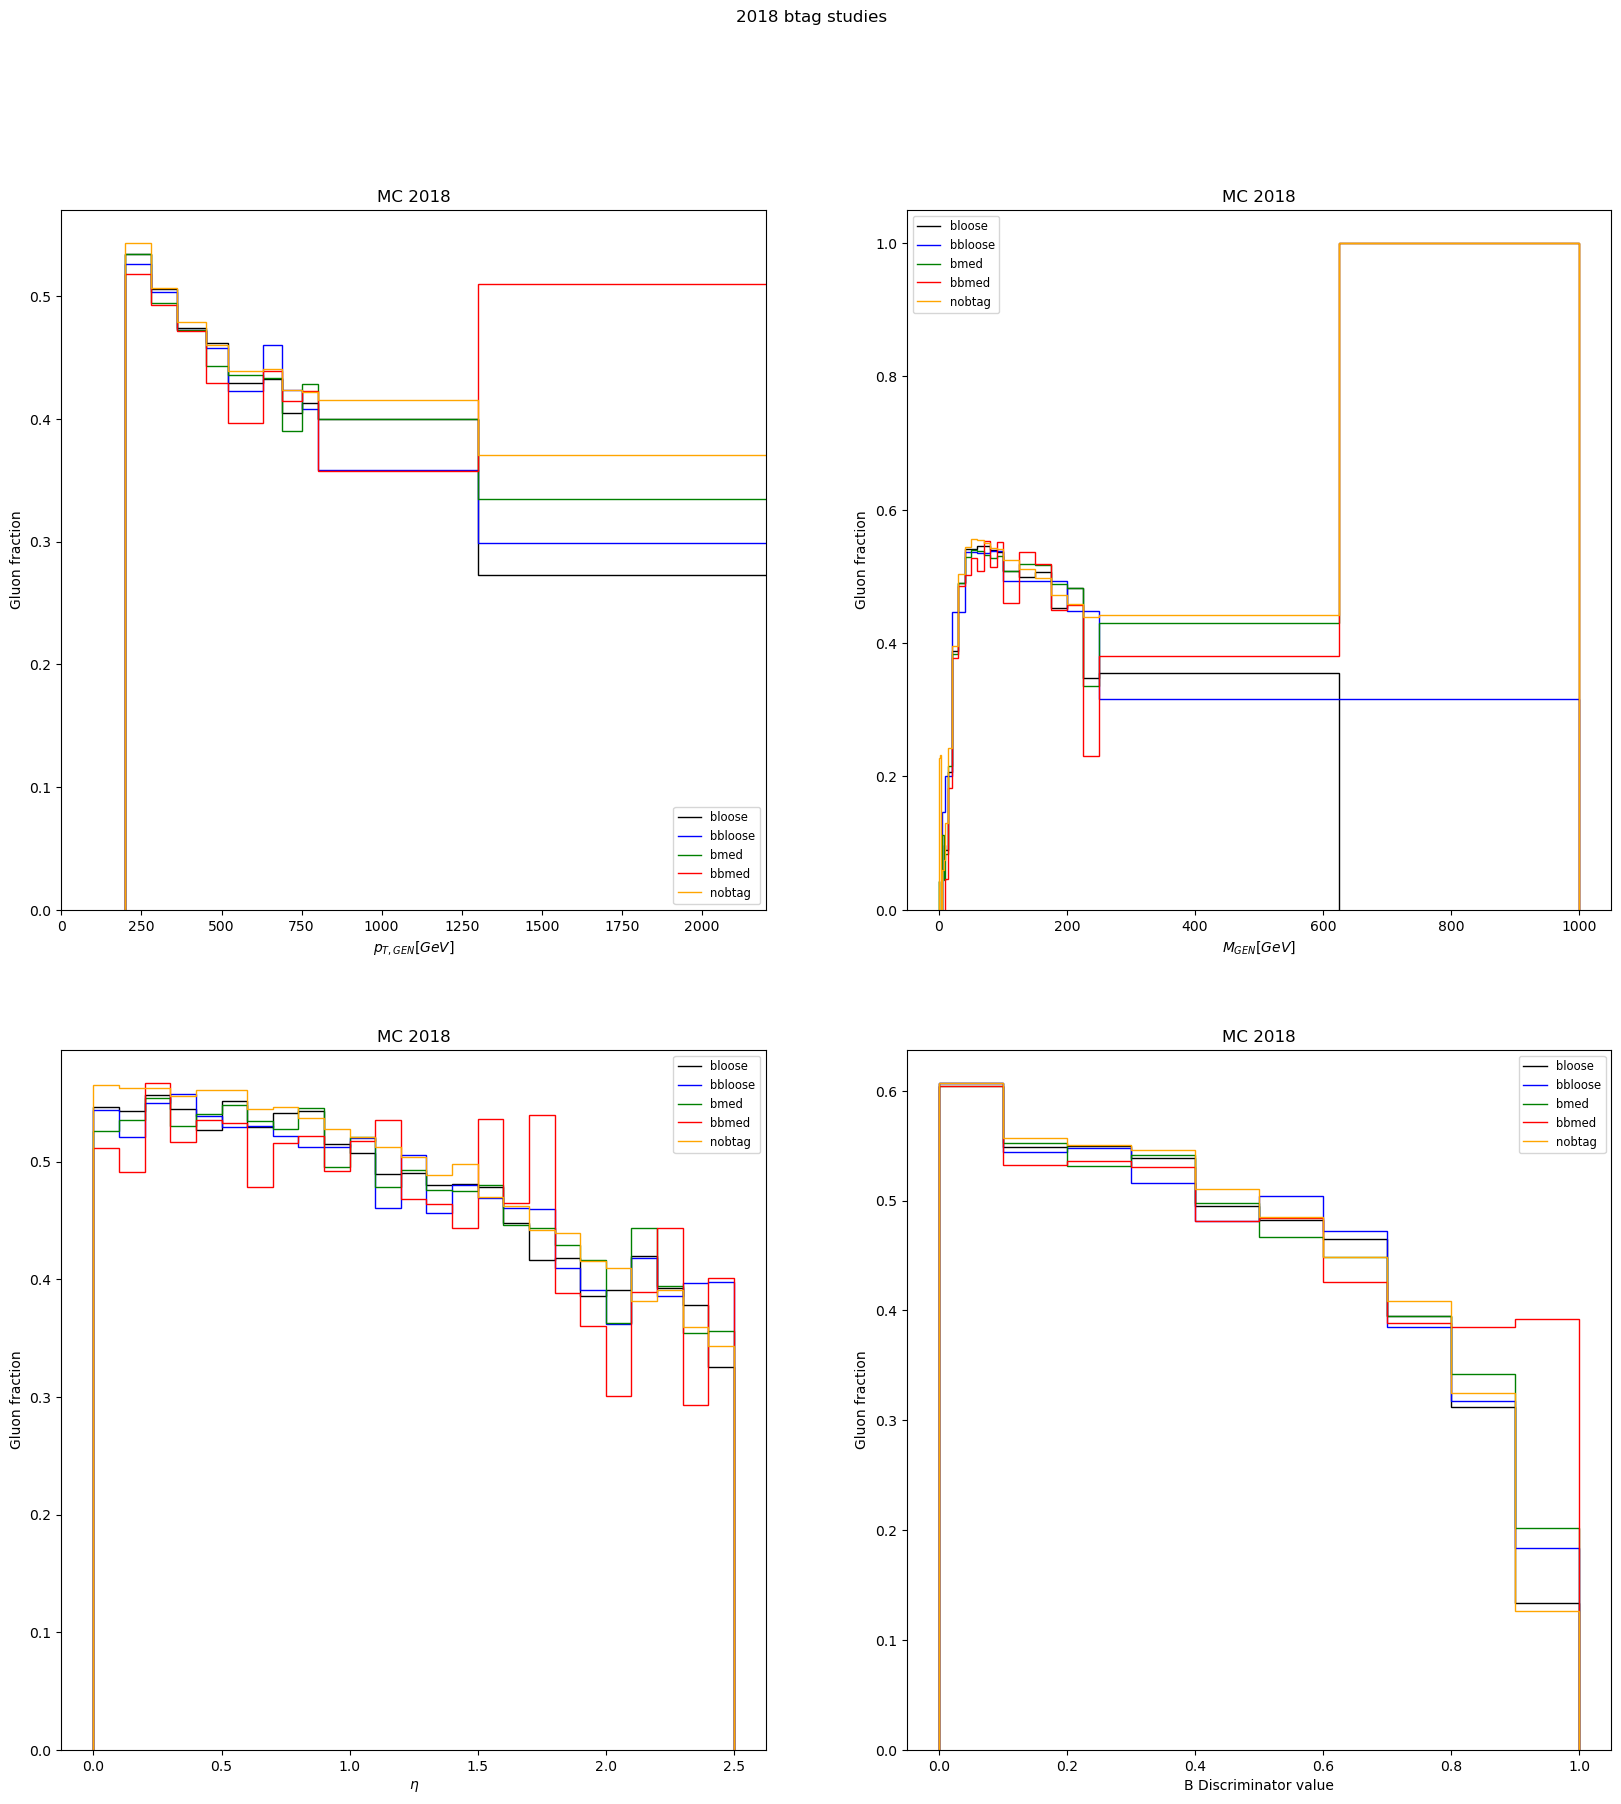

In [21]:
#### B TAG PLOTS OLD WAY
bloose_num = [result_bloose['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptreco'), 
               result_bloose['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('mreco'), 
               result_bloose['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('eta'), 
               result_bloose['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('frac') ]
bloose_denom = [result_bloose['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptreco'), 
                 result_bloose['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mreco'), 
                 result_bloose['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_bloose['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
bbloose_num = [result_bbloose['jet_pt'][{'partonFlav':"Gluon", 'jetNumb':'jet3'}].project('ptgen'), 
               result_bbloose['jet_mass'][{'partonFlav':"Gluon", 'jetNumb':'jet3'}].project('mgen'), 
               result_bbloose['jet_eta'][{'partonFlav':"Gluon", 'jetNumb':'jet3'}].project('eta'), 
               result_bbloose['btag'][{'partonFlav':"Gluon", 'jetNumb':'jet3'}].project('frac') ]
bbloose_denom = [result_bbloose['jet_pt'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptgen'), 
                 result_bbloose['jet_mass'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mgen'), 
                 result_bbloose['jet_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_bbloose['btag'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
bbmed_num = [result_bbmed['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptreco'), 
               result_bbmed['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('mreco'), 
               result_bbmed['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('eta'), 
               result_bbmed['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('frac') ]
bbmed_denom = [result_bbmed['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptreco'), 
                 result_bbmed['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mreco'), 
                 result_bbmed['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_bbmed['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
bmed_num = [result_bmed['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptreco'), 
               result_bmed['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('mreco'), 
               result_bmed['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('eta'), 
               result_bmed['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('frac') ]
bmed_denom = [result_bmed['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptreco'), 
                 result_bmed['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mreco'), 
                 result_bmed['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_bmed['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
nobtag_num = [result_nobtag['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptreco'), 
               result_nobtag['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('mreco'), 
               result_nobtag['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('eta'), 
               result_nobtag['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('frac') ]
nobtag_denom = [result_nobtag['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptreco'), 
                 result_nobtag['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mreco'), 
                 result_nobtag['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_nobtag['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
nums = [bloose_num, bbloose_num, bmed_num, bbmed_num, nobtag_num]
denoms = [bloose_denom, bbloose_denom, bmed_denom, bbmed_denom, nobtag_denom]
btag_names = ['bloose', 'bbloose', 'bmed', 'bbmed', 'nobtag']
colors = ['k', 'b', 'g', 'r', 'orange', 'c', 'm']
xlabels = ['$p_{T, GEN} [GeV]$', '$M_{GEN} [GeV]$', '$\eta$', 'B Discriminator value']
plt.rcParams["figure.figsize"] = (20,20)
plt.rc('legend',fontsize='small')
fig = plt.figure()
fig, axs = plt.subplots(2, 2)
fig.suptitle('2018 btag studies')
for j in range(len(btag_names)):
    for i, ax in enumerate(axs.flatten()):
        plotratio_cms(nums[j][i], denoms[j][i], axs.flatten()[i], colors[j], btag_names[j])
        ax.set_title("MC 2018")
        ax.set_xlabel(xlabels[i])
        ax.set_ylabel("Gluon fraction")
        ax.legend()
axs.flatten()[0].set_xlim([0,2200])
plt.savefig(os_path+"/btagRatios2018.png")

<Figure size 2000x2000 with 0 Axes>

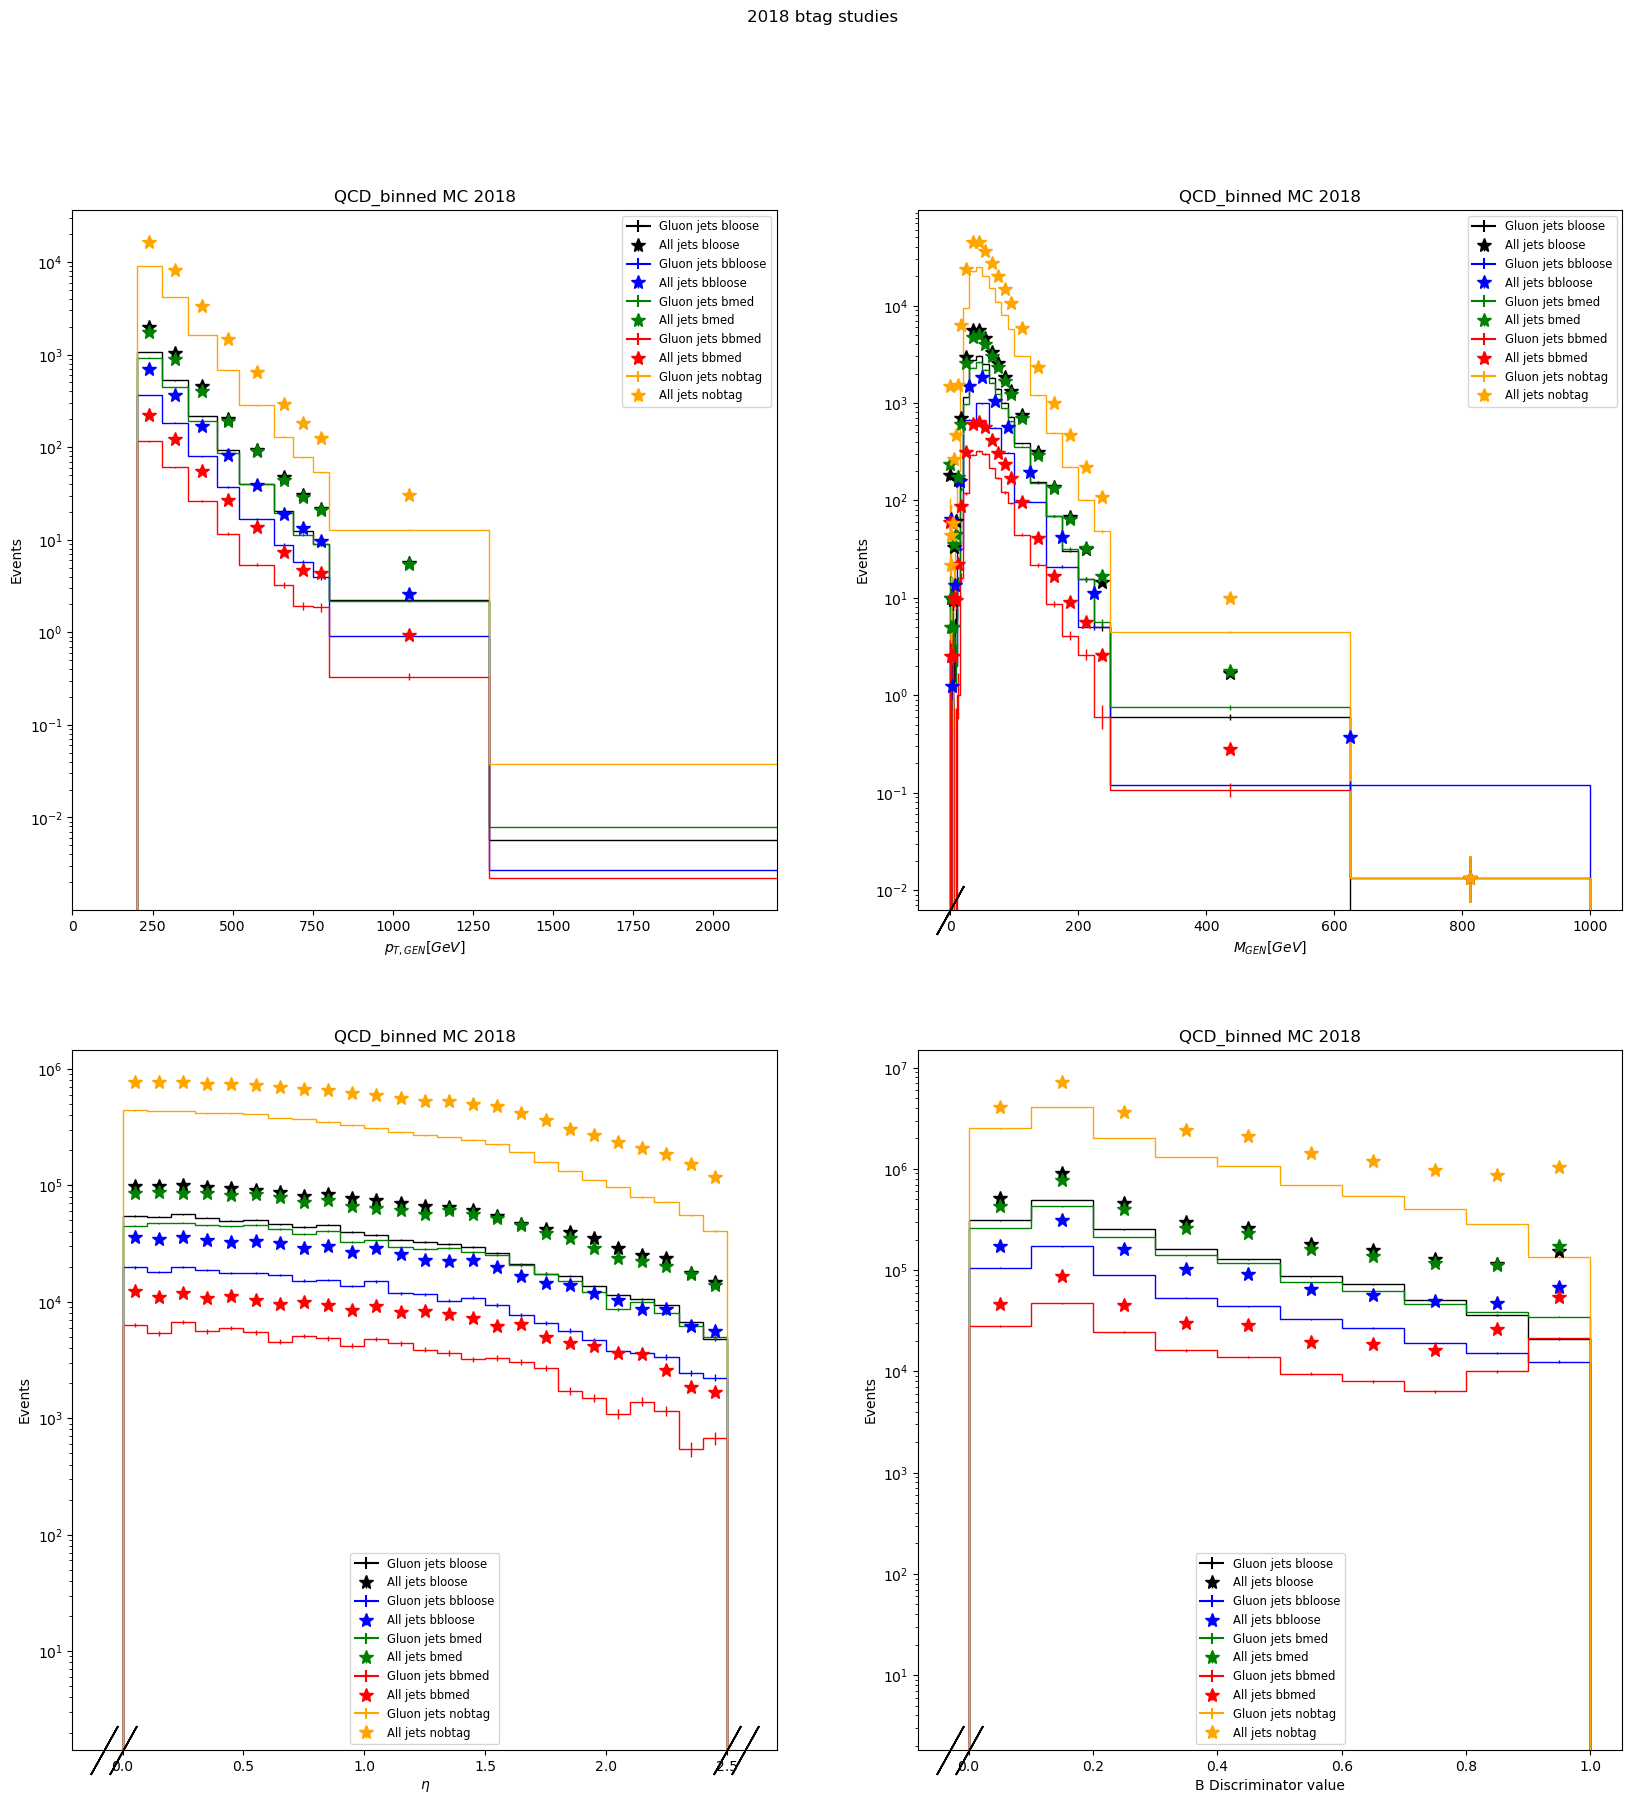

In [22]:
plt.rcParams["figure.figsize"] = (20,20)
plt.rc('legend',fontsize='small')
fig = plt.figure()
fig, axs = plt.subplots(2, 2)
fig.suptitle('2018 btag studies')
for j in range(len(btag_names)):
    for i, ax in enumerate(axs.flatten()):
        hep.histplot(nums[j][i], stack=False, histtype='step', binwnorm=1,
                         ax=ax, density=False, linestyle =["-"], color = colors[j], linewidth=1,
                         label=['Gluon jets '+btag_names[j]])
        hep.histplot(denoms[j][i], stack=False, histtype='errorbar', binwnorm=1,
                         ax=ax, density=False, marker =["*"], color = colors[j],
                         label=['All jets '+btag_names[j]])
        ax.set_title("QCD_binned MC 2018")
        ax.set_yscale('log')
        ax.set_xlabel(xlabels[i])
        ax.set_ylabel("Events")
        ax.legend()
axs.flatten()[0].set_xlim([0,2200])
plt.savefig(os_path+"/btaggedJets2018.png")

In [23]:
fname = "coffeaOutput/dijetHists_wXSscaling_QCDsim_pt200.0_rapidity2.5jesjecL1PU2016.pkl"
with open(fname, "rb") as f:
    result = pickle.load( f )
for key in list(result['cutflow'].keys()):
    if "nEvents" in key:
        print(key, ": ", result['cutflow'][key])
print(result['cutflow'].keys())
print("fakes: ", result['cutflow']["fakes nominal"])
print("misses: ", result['cutflow']["misses nominal"])

nEvents initial :  271866748
nEvents2016/QCD_Pt_1000to1400_TuneCP5_13TeV_pythia8/RunIISummer20UL16NanoAODv9-106X_mcRun2_asymptotic_v17-v1/NANOAODSIM :  19581845
nEvents after gen rapidity,pT, and nJet selection nominal :  218814996
nEvents after gen dphi and ptasymm selection nominal :  216170991
nEvents after reco kine selection nominal :  182158178
nEvents after pT assym. and eta selection nominal :  180937269
nEvents after gen matching nominal :  180917587
nEvents final selection nominal :  180917587
nEvents after gen rapidity,pT, and nJet selection jesUp :  218814996
nEvents after gen dphi and ptasymm selection jesUp :  216170991
nEvents after reco kine selection jesUp :  183015758
nEvents after pT assym. and eta selection jesUp :  181773821
nEvents after gen matching jesUp :  181753379
nEvents final selection jesUp :  181753379
nEvents after gen rapidity,pT, and nJet selection jesDown :  218814996
nEvents after gen dphi and ptasymm selection jesDown :  216170991
nEvents after reco

In [24]:
fname = "coffeaOutput/dijetHists_JetHT_pt200.0_rapidity2.5jesjecL1PU2016.pkl"
with open(fname, "rb") as f:
    result = pickle.load( f )
for key in list(result['cutflow'].keys()):
    if "nEvents" in key:
        print(key, ": ", result['cutflow'][key])
print(result["cutflow"].keys())

nEvents initial :  128770596
nEvents2016/JetHT/Run2016F-UL2016_MiniAODv2_NanoAODv9-v1/NANOAOD :  6613811
nEvents after reco kine selection nominal :  1817555
nEvents after pT assym. and eta selection nominal :  1742829
nEvents final selection nominal :  1742829
nEvents2016/JetHT/Run2016H-UL2016_MiniAODv2_NanoAODv9-v1/NANOAOD :  122156785
dict_keys(['nEvents initial', 'nEvents2016/JetHT/Run2016F-UL2016_MiniAODv2_NanoAODv9-v1/NANOAOD', 'nEvents after reco kine selection nominal', 'nEvents after pT assym. and eta selection nominal', 'nEvents final selection nominal', 'chunks', 'nEvents2016/JetHT/Run2016H-UL2016_MiniAODv2_NanoAODv9-v1/NANOAOD'])


In [25]:
fname = "coffeaOutput/trijetHists_JetHT_pt200.0_rappidity2.5_Nonejesjec2016.pkl"
with open(fname, "rb") as f:
    result = pickle.load( f )
for key in list(result['cutflow'].keys()):
    if "nEvents" in key:
        print(key, ": ", result['cutflow'][key])
print(result["cutflow"].keys())

nEvents initial :  125069450
nEvents2016/JetHT/Run2016F-UL2016_MiniAODv2_NanoAODv9-v1/NANOAOD :  6613811
nEvents after trigger sel nominal :  1964487
nEvents after reco kine selection nominal :  423998
nEvents after reco topo selection nominal :  171859
nEvents after reco btag nominal :  171859
nEvents final selection :  171859
nEvents2016/JetHT/Run2016H-UL2016_MiniAODv2_NanoAODv9-v1/NANOAOD :  118455639
dict_keys(['nEvents initial', 'nEvents2016/JetHT/Run2016F-UL2016_MiniAODv2_NanoAODv9-v1/NANOAOD', 'nEvents after trigger sel nominal', 'nEvents after reco kine selection nominal', 'nEvents after reco topo selection nominal', 'nEvents after reco btag nominal', 'nEvents final selection', 'chunks', 'nEvents2016/JetHT/Run2016H-UL2016_MiniAODv2_NanoAODv9-v1/NANOAOD'])


In [27]:
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_Nonejesjec2016.pkl"
with open(fname, "rb") as f:
    result = pickle.load( f )
print(result.keys())

dict_keys(['alljet_ptreco_mreco', 'btag_eta', 'njet_gen', 'dphimin_gen', 'asymm_gen', 'njet_reco', 'dphimin_reco', 'asymm_reco', 'jet_dr_reco_gen', 'jet_mass_reco_over_gen', 'jet_pt_reco', 'jet_pt_gen', 'jet_pt_reco_over_gen', 'jet_eta_reco', 'jet_eta_gen', 'jet_rap_reco', 'jet_rap_gen', 'jet_dphi_reco', 'jet_ptasymm_reco', 'jet_dr_gen_subjet', 'jet_dr_reco_to_gen_subjet', 'jet_sd_mass_reco', 'jet_sd_mass_gen', 'misses_g', 'fakes_g', 'misses', 'fakes', 'jet_pt_mass_reco_u', 'jet_pt_mass_reco_g', 'jet_pt_mass_gen_u', 'jet_pt_mass_gen_g', 'jet_m_pt_u_reco_over_gen', 'jet_m_pt_g_reco_over_gen', 'response_matrix_u', 'response_matrix_g', 'cutflow', 'weights', 'systematics'])


<Figure size 2000x2000 with 0 Axes>

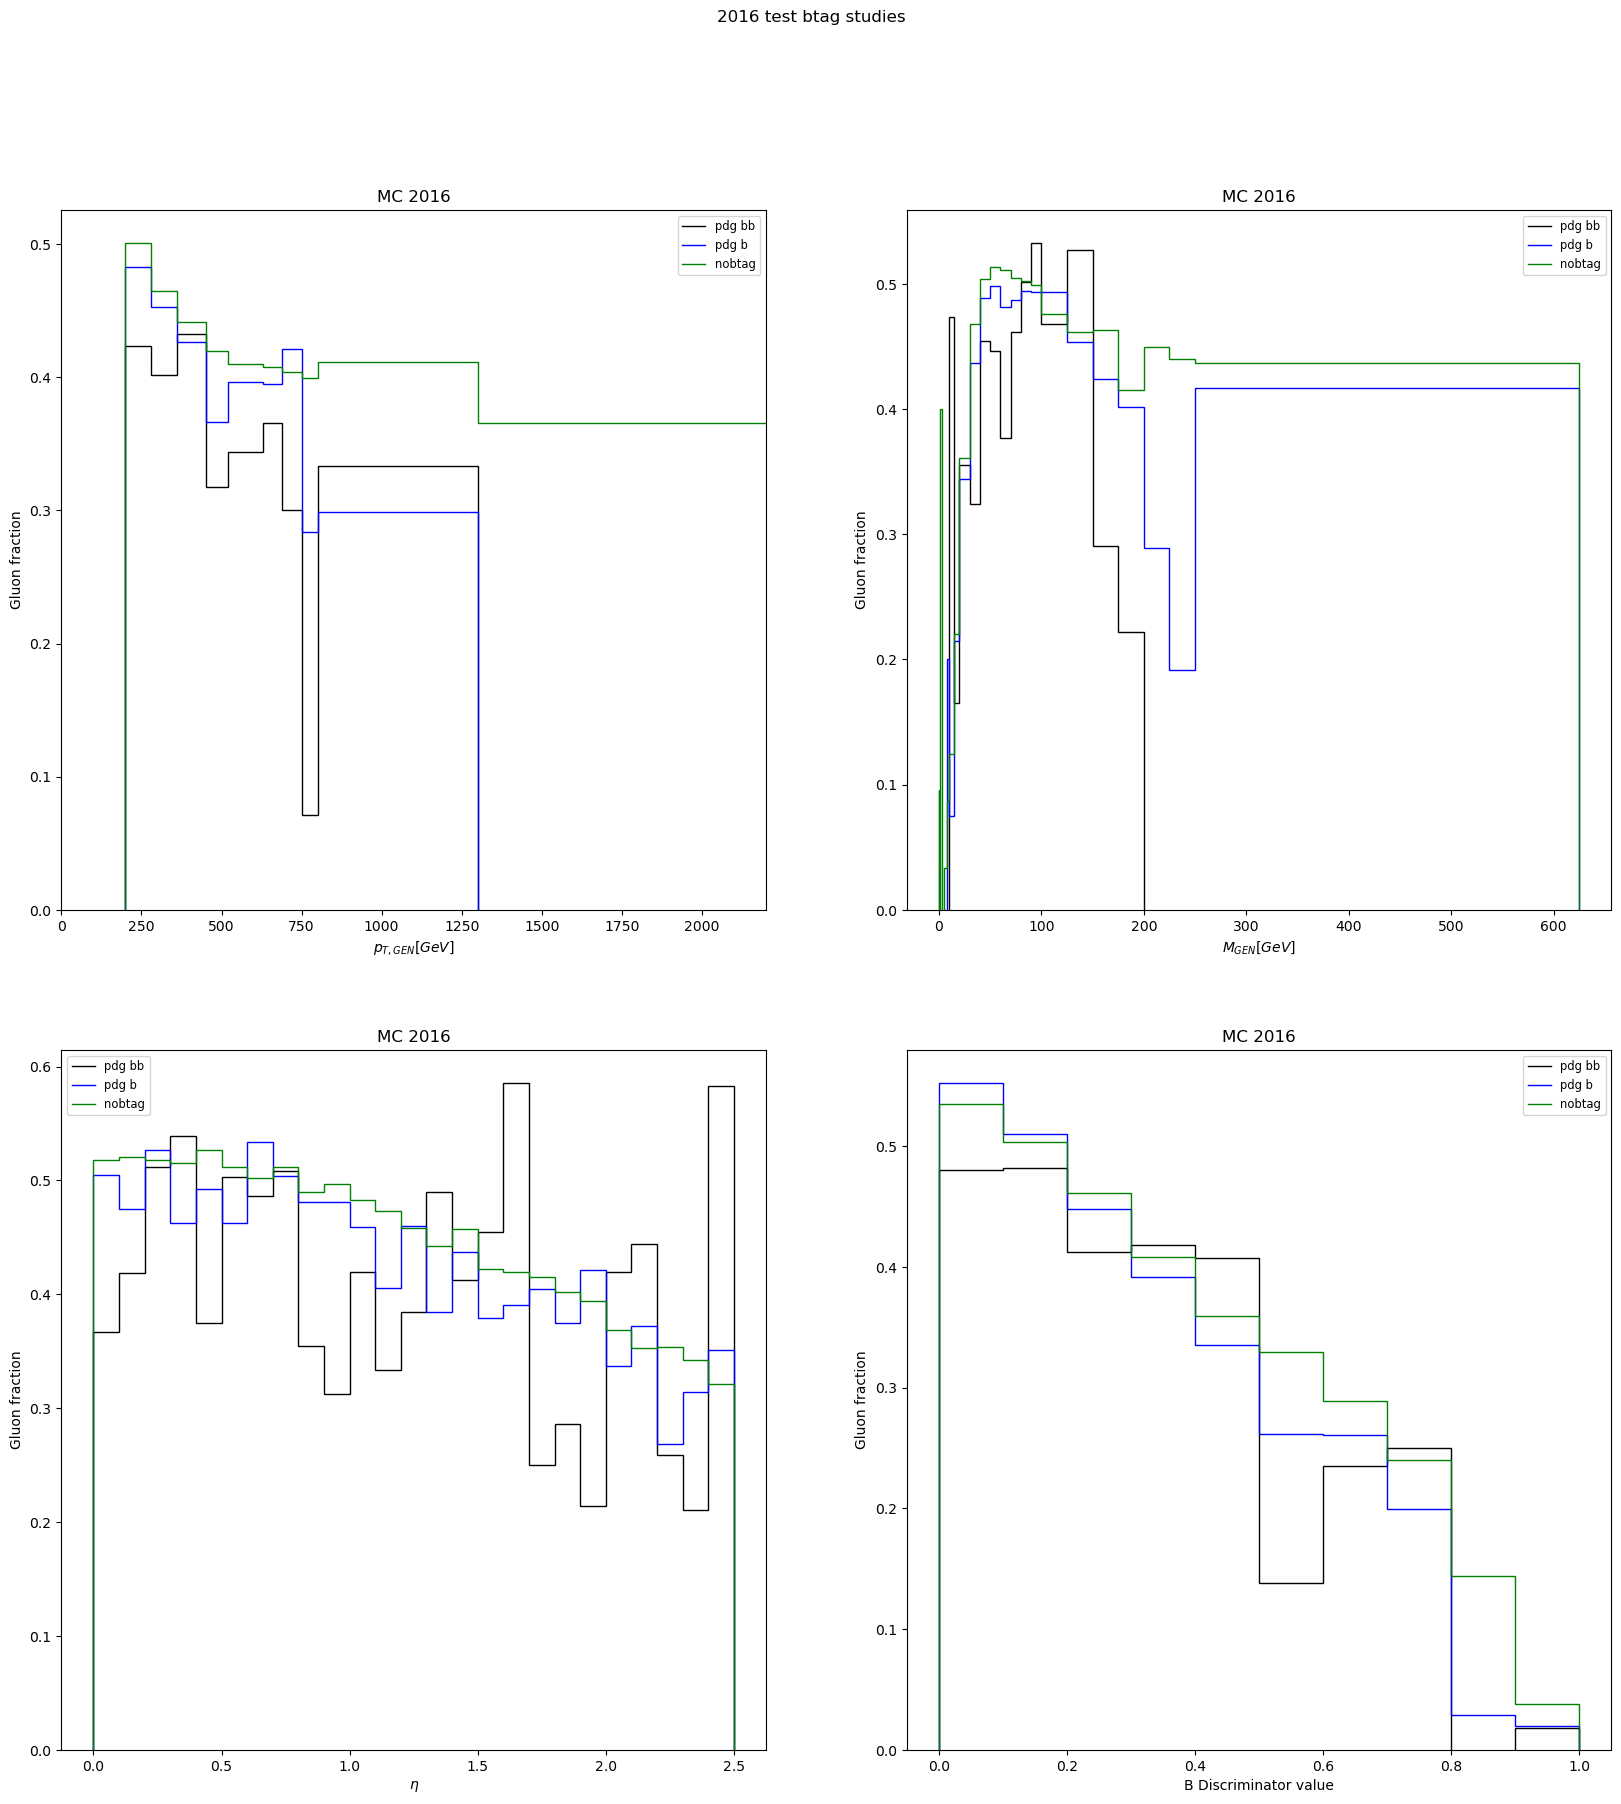

In [28]:
nobtag_num = [result['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptreco'), 
               result['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('mreco'), 
               result['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('eta'), 
               result['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('frac') ]
nobtag_denom = [result['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptreco'), 
                 result['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mreco'), 
                 result['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
pdgbb_num = [result['alljet_ptreco_mreco'][{'partonFlav':'Gluon_bb', 'jetNumb':'jet3'}].project('ptreco'), 
               result['alljet_ptreco_mreco'][{'partonFlav':'Gluon_bb', 'jetNumb':'jet3'}].project('mreco'), 
               result['btag_eta'][{'partonFlav':'Gluon_bb', 'jetNumb':'jet3'}].project('eta'), 
               result['btag_eta'][{'partonFlav':'Gluon_bb', 'jetNumb':'jet3'}].project('frac') ]
pdgbb_denom = [result['alljet_ptreco_mreco'][{'partonFlav':'All_bb', 'jetNumb':'jet3'}].project('ptreco'), 
                 result['alljet_ptreco_mreco'][{'partonFlav':'All_bb', 'jetNumb':'jet3'}].project('mreco'), 
                 result['btag_eta'][{'partonFlav':'All_bb', 'jetNumb':'jet3'}].project('eta'), 
                 result['btag_eta'][{'partonFlav':'All_bb', 'jetNumb':'jet3'}].project('frac') ]
pdgb_num = [result['alljet_ptreco_mreco'][{'partonFlav':'Gluon_b', 'jetNumb':'jet3'}].project('ptreco'), 
               result['alljet_ptreco_mreco'][{'partonFlav':'Gluon_b', 'jetNumb':'jet3'}].project('mreco'), 
               result['btag_eta'][{'partonFlav':'Gluon_b', 'jetNumb':'jet3'}].project('eta'), 
               result['btag_eta'][{'partonFlav':'Gluon_b', 'jetNumb':'jet3'}].project('frac') ]
pdgb_denom = [result['alljet_ptreco_mreco'][{'partonFlav':'All_b', 'jetNumb':'jet3'}].project('ptreco'), 
                 result['alljet_ptreco_mreco'][{'partonFlav':'All_b', 'jetNumb':'jet3'}].project('mreco'), 
                 result['btag_eta'][{'partonFlav':'All_b', 'jetNumb':'jet3'}].project('eta'), 
                 result['btag_eta'][{'partonFlav':'All_b', 'jetNumb':'jet3'}].project('frac') ]
nums = [pdgbb_num, pdgb_num, nobtag_num]
denoms = [pdgbb_denom, pdgb_denom, nobtag_denom]
btag_names = ['pdg bb', 'pdg b', 'nobtag']
colors = ['k', 'b', 'g', 'r', 'orange', 'c', 'm']
xlabels = ['$p_{T, GEN} [GeV]$', '$M_{GEN} [GeV]$', '$\eta$', 'B Discriminator value']
plt.rcParams["figure.figsize"] = (20,20)
plt.rc('legend',fontsize='small')
fig = plt.figure()
fig, axs = plt.subplots(2, 2)
fig.suptitle('2016 test btag studies')
for j in range(len(btag_names)):
    for i, ax in enumerate(axs.flatten()):
        plotratio_cms(nums[j][i], denoms[j][i], axs.flatten()[i], colors[j], btag_names[j])
        ax.set_title("MC 2016")
        ax.set_xlabel(xlabels[i])
        ax.set_ylabel("Gluon fraction")
        ax.legend()
axs.flatten()[0].set_xlim([0,2200])
plt.savefig(os_path+"/btagRatios2016test.png")

<Figure size 2000x2000 with 0 Axes>

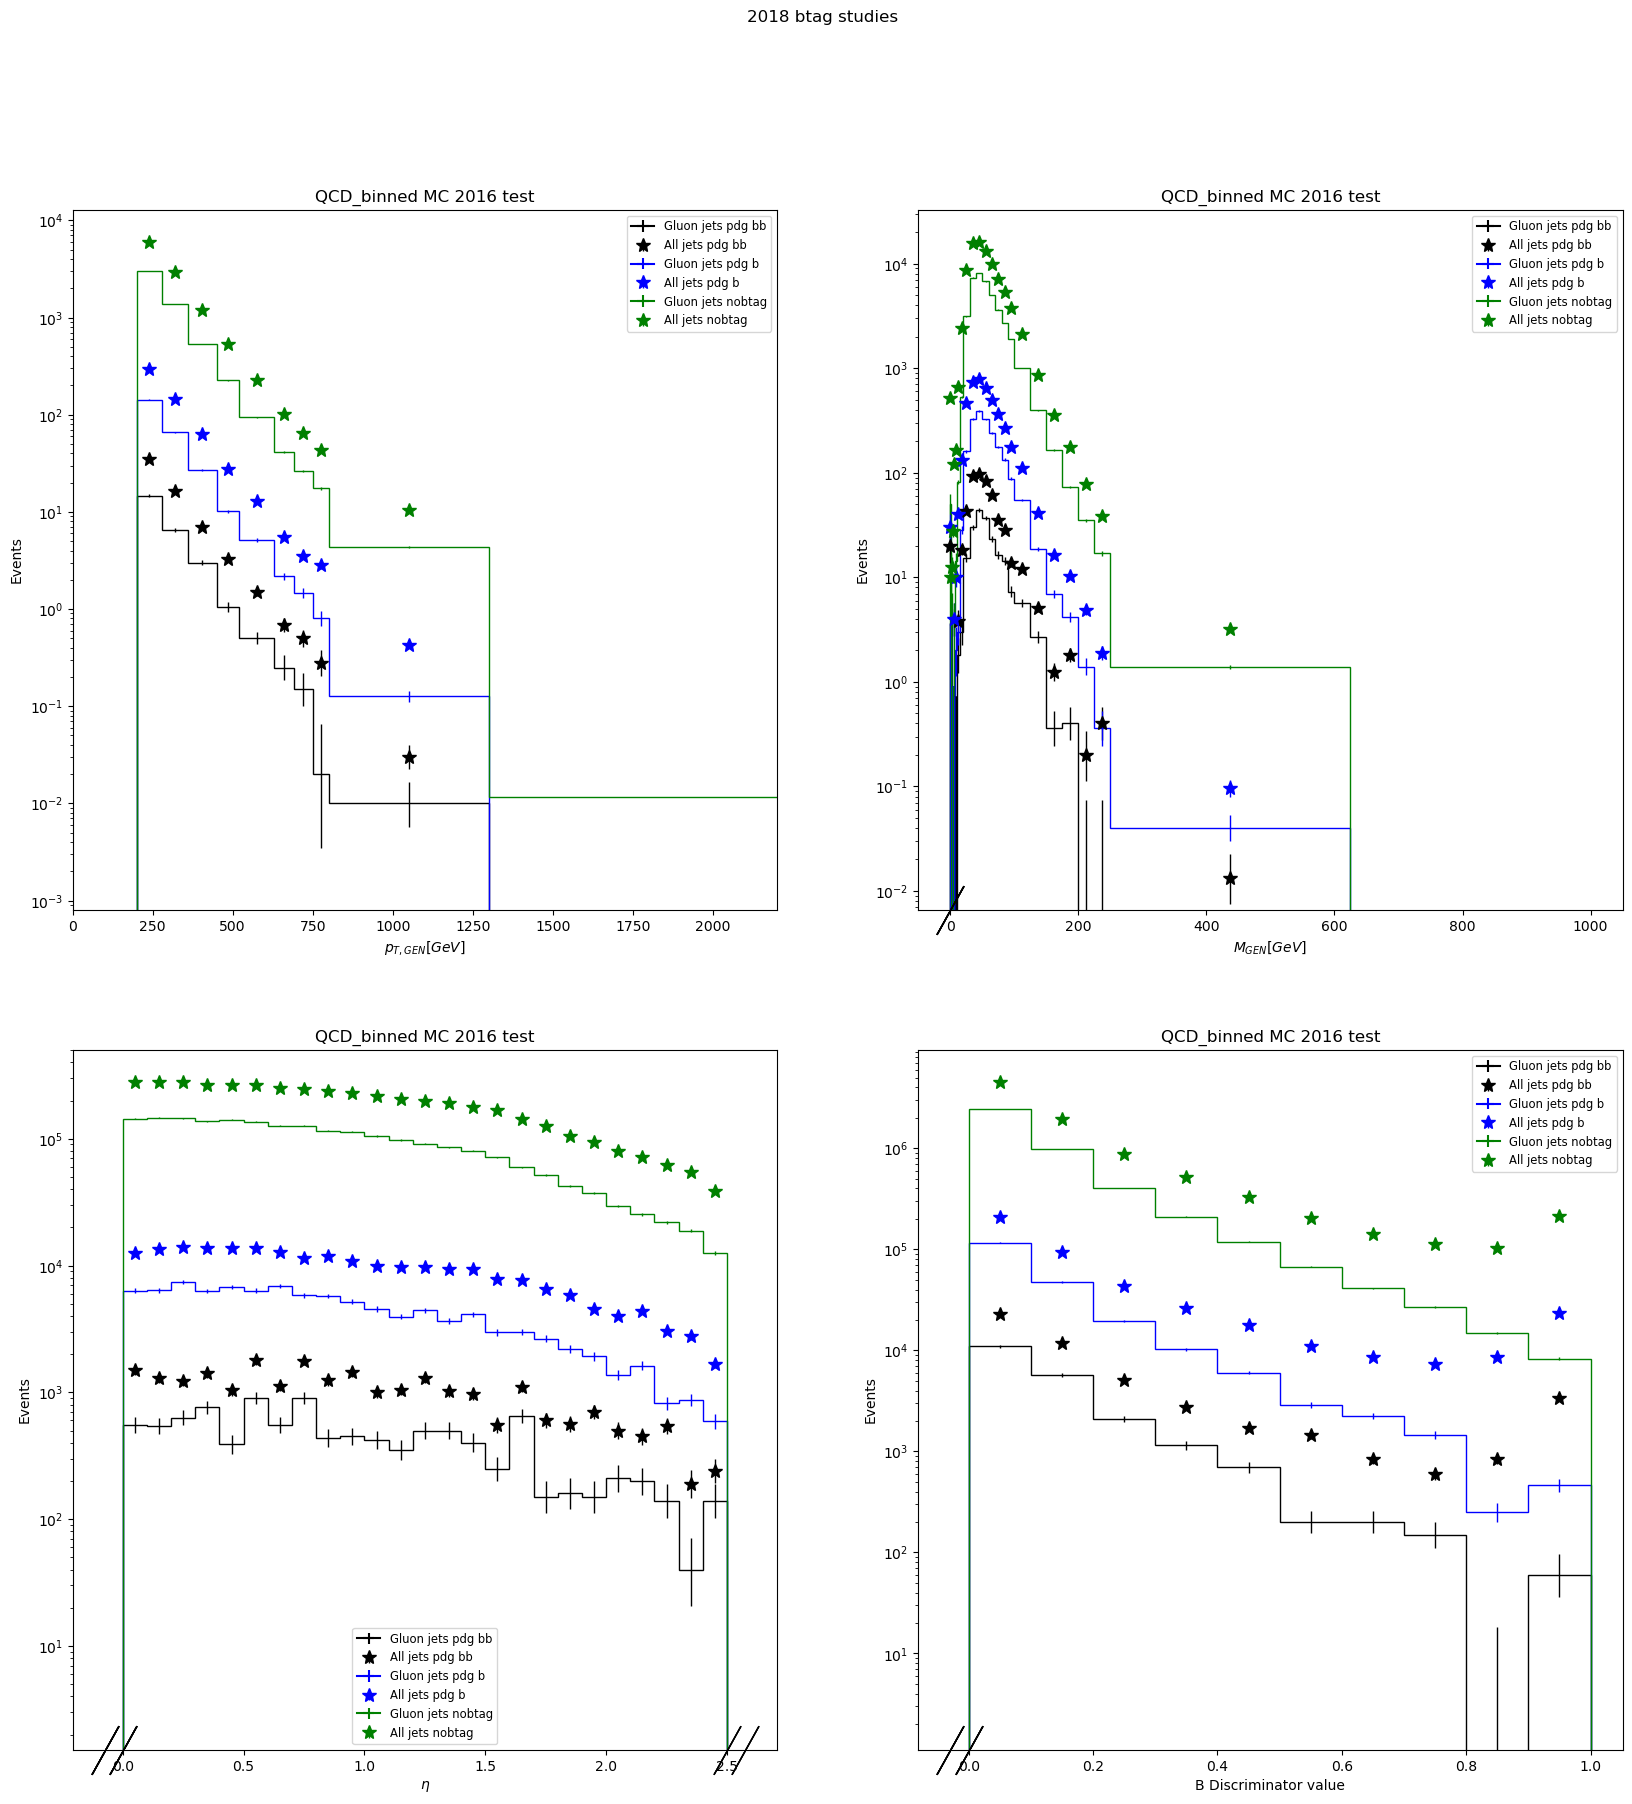

In [29]:
plt.rcParams["figure.figsize"] = (20,20)
plt.rc('legend',fontsize='small')
fig = plt.figure()
fig, axs = plt.subplots(2, 2)
fig.suptitle('2018 btag studies')
for j in range(len(btag_names)):
    for i, ax in enumerate(axs.flatten()):
        hep.histplot(nums[j][i], stack=False, histtype='step', binwnorm=1,
                         ax=ax, density=False, linestyle =["-"], color = colors[j], linewidth=1,
                         label=['Gluon jets '+btag_names[j]])
        hep.histplot(denoms[j][i], stack=False, histtype='errorbar', binwnorm=1,
                         ax=ax, density=False, marker =["*"], color = colors[j],
                         label=['All jets '+btag_names[j]])
        ax.set_title("QCD_binned MC 2016 test")
        ax.set_yscale('log')
        ax.set_xlabel(xlabels[i])
        ax.set_ylabel("Events")
        ax.legend()
axs.flatten()[0].set_xlim([0,2200])
plt.savefig(os_path+"/btaggedJets2016test.png")